In [ ]:
! pip install vadersentiment
! pip install pandas numpy matplotlib seaborn yfinance textblob
! pip install nltk
! pip install beautifulsoup4
! pip install requests
! pip install lxml
! pip install html5lib
! pip install scikit-learn
! pip install spacy
! python -m spacy download en_core_web_sm
! pip install sentence_transformers
! pip install transformers
! pip install gensim
! pip install xgboost




In [114]:
from google.colab import drive
import pandas as pd
import numpy as np
from textblob import TextBlob #TextBlob library is used for processing textual data.
import matplotlib.pyplot as plt
import seaborn as sns  # built on top of matplotlib and is useful in providing high level interface for drawing attractive and informative statistical graphics.
import yfinance as yf  # it is used to fetch financial data
from datetime import datetime
import re

# Here we Import SentimentIntensityAnalyzer for sentiment analysis using VADER model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import required functions for machine learning tasks from sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import nltk
import requests
nltk.download('vader_lexicon')
import spacy
import torch
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer
from gensim.models import KeyedVectors
import gensim.downloader as api


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [115]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup #BeautifulSoup is a python library and is used here for parsing HTML documents.
from datetime import date

In [8]:
#To create a directory
import os

drive.mount('drive',force_remount = True)

path = 'drive/My Drive'

os.makedirs(path, exist_ok=True)



Mounted at drive


In [ ]:
# In this project i scrapped the data from 2 websites.
# This code is for web scrapping from website 1

tickers_symbol=['TSLA', 'AAPL', 'AMZN'] #THREE companies choosed for stock sentiment analysis.

url2='https://markets.businessinsider.com/news/'  #URL for scraping news

L=[]  # defined an empty list to store the data.

df1 = pd.DataFrame(columns=['Ticker','Datetime','News'])

for ticker in tickers_symbol:  # Loop for each ticker symbol

  for page in range(1,390): # Loop for a range of pages (1 to 390)

    market_insider_url= url2 + ticker + '-stock?p=' + str(page)  # here we construct the URL for each page of news for the ticker.

    Response2= requests.get(market_insider_url)
    Response2.raise_for_status()
    html= Response2.text

    soup = BeautifulSoup(html, 'lxml')  # Parse the HTML content using BeautifulSoup.

    articles = soup.find_all('div', class_="latest-news__story") # Finding all news articles on the page.


    for article in articles:
        Datetime = article.find('time', class_="latest-news__date").get('datetime')
        news1= article.find('a', class_= "news-link").text
        L.append([ticker,Datetime,news1])
        df1= pd.DataFrame(L, columns=df1.columns) # storing data of the list into dataframe df1.

df1['Time'] = pd.to_datetime(df1['Datetime']).dt.time # Extracting the time from the 'Datetime' column and storing it in a column 'time'.
df1['Date'] = pd.to_datetime(df1['Datetime']).dt.date # Extracting the date from the 'Datetime' column and storing it in a column 'date'.
df1.to_csv('/content/drive/My Drive/df1.csv')








In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/df1.csv')
df2=df1.drop(columns=['Unnamed: 0','Datetime']) # i dont need the column datetime ahead so it has been dropped.

df2.to_csv('/content/drive/My Drive/df2.csv')

df2.head()


,Ticker,News,Time,Date
0,TSLA,Why Is Reliance Global (RELI) Stock Up 283% To...,14:56:00,2024-06-18
1,TSLA,Zyn Sales Suspended: Philip Morris Halts Zyn O...,14:44:11,2024-06-18
2,TSLA,NVDA Stock Alert: SCOTUS Will Hear Nvidia Case...,14:30:19,2024-06-18
3,TSLA,TSLA Stock Alert: Tesla Sues Battery Supplier ...,14:13:05,2024-06-18
4,TSLA,Direxion Daily TSLA Bull And Bear ETFs Give Tr...,14:07:11,2024-06-18


In [ ]:
# this is the code for web scrapping for website 2.

url1='https://finviz.com/quote.ashx?t=' # url for scrapping news.
tickers_symbol=['TSLA', 'AAPL', 'AMZN']

Stock_news_tables={} # defined a dictionary to store the data extracted.

for ticker in tickers_symbol: # loop for each ticker(company).
  finviz_url= url1 + ticker

  Req= Request(url= finviz_url, headers={'user-agent': 'Stock-sentiment-analysis'}) # here we send a GET request to the URL.
  Response=urlopen(Req)
  Source_code= BeautifulSoup(Response,'html.parser') #parsing html data using beautifulsoup.

  Stock_news_table=Source_code.find(id='news-table')
  Stock_news_tables[ticker]=Stock_news_table


In [ ]:
Parsed_data =[]

for ticker, Stock_news_table in Stock_news_tables.items():

  for row in  Stock_news_table.findAll('tr') :
    # Extract the news text.
    if row.a:
      News = row.a.get_text()
    else:
      continue

    # Extract the date and time.

    date_data = row.td.text.strip()
    Date_data = date_data.split(' ')

    if len(Date_data)==1:
      Time= Date_data[0]

    else:
      Date= Date_data[0]
      Time= Date_data[1]

    # Append the extracted data to the list.

    Parsed_data.append([ticker, News, Time,Date])

df= pd.DataFrame(Parsed_data, columns=['Ticker','News','Time','Date']) # here the parsed data is converted to a DataFrame.


df.head() # Display the DataFrame with the sentiment scores.


,Ticker,News,Time,Date
0,TSLA,Tesla China Registrations Are Down 9% With Two...,04:03PM,Today
1,TSLA,7 Stocks to Buy Now: June 2024,02:30PM,Today
2,TSLA,There Are Better Picks to Enjoy the Fruits of ...,02:24PM,Today
3,TSLA,Elon Musk wants to turn X into a Venmo competitor,02:08PM,Today
4,TSLA,Teslas Model Y Is the Most American Car. How a...,01:45PM,Today


In [ ]:
# Defined a function to parse dates.
def parse_date(Date_str):

  # Convert the date string to a datetime object.
  if Date_str.lower() == 'today':
    return date.today().strftime('%Y-%m-%d')
  else:
    return datetime.strptime(Date_str, '%b-%d-%y').strftime('%Y-%m-%d')

# Applying the parse_date function to the 'Date' column.

df['Date'] = df["Date"].apply(parse_date)
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M%p').dt.time

df.to_csv('/content/drive/My Drive/df.csv') # Saved the DataFrame df to a CSV file.

df.head()

,Ticker,News,Time,Date
0,TSLA,Tesla China Registrations Are Down 9% With Two...,16:03:00,2024-06-18
1,TSLA,7 Stocks to Buy Now: June 2024,14:30:00,2024-06-18
2,TSLA,There Are Better Picks to Enjoy the Fruits of ...,14:24:00,2024-06-18
3,TSLA,Elon Musk wants to turn X into a Venmo competitor,14:08:00,2024-06-18
4,TSLA,Teslas Model Y Is the Most American Car. How a...,13:45:00,2024-06-18


In [ ]:
frames = [df, df2] # defined a list frames to store 2 data frames.

df_final = pd.concat(frames) # combining the data we got from 2 different websites.

df_final.to_csv('/content/drive/My Drive/df_final2.csv')


df_final2 = df_final.groupby(['Date', 'Ticker']).agg({'News': lambda x: ' '.join(x)}).reset_index()
df_final2.head()





,Date,Ticker,News
0,2013-03-19,AAPL,"Samsung working on wristwatch, joins Apple: so..."
1,2013-03-21,AAPL,Apple investors pay more for downside bets
2,2013-03-22,AAPL,Apple investors pay more for downside bets
3,2013-03-24,AAPL,Apple buys Silicon Valley startup WiFiSlam
4,2013-03-26,AAPL,U.S. court questions public interest scope in ...


In [ ]:
df_final2.to_csv('/content/drive/My Drive/df_final2.csv')

In [ ]:

sorted_df = df_final2.sort_values(by=['Ticker', 'Date']) # to sort the data company wise.


In [ ]:

nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)


sorted_df['Cleaned_News'] = sorted_df['News'].apply(clean_text)
sorted_df.head()







,Date,Ticker,News,Cleaned_News
0,2013-03-19,AAPL,"Samsung working on wristwatch, joins Apple: so...",Samsung work wristwatch join Apple source
1,2013-03-21,AAPL,Apple investors pay more for downside bets,apple investor pay downside bet
2,2013-03-22,AAPL,Apple investors pay more for downside bets,apple investor pay downside bet
3,2013-03-24,AAPL,Apple buys Silicon Valley startup WiFiSlam,Apple buy Silicon Valley startup WiFiSlam
4,2013-03-26,AAPL,U.S. court questions public interest scope in ...,U.S. court question public interest scope Appl...


In [ ]:
vader = SentimentIntensityAnalyzer()

func= lambda News: vader.polarity_scores(News)['compound'] # defined a lambda function to apply the sentiment analysis on the news text.

sorted_df['compound']= sorted_df['Cleaned_News'].apply(func) # here we have Applied the sentiment analysis function to the 'News' column and stored the results in a new column "compound".
sorted_df.to_csv('/content/drive/My Drive/sorted_df.csv')

sorted_df.head()




,Date,Ticker,News,Cleaned_News,compound
0,2013-03-19,AAPL,"Samsung working on wristwatch, joins Apple: so...",Samsung work wristwatch join Apple source,0.2960
1,2013-03-21,AAPL,Apple investors pay more for downside bets,apple investor pay downside bet,-0.3400
2,2013-03-22,AAPL,Apple investors pay more for downside bets,apple investor pay downside bet,-0.3400
3,2013-03-24,AAPL,Apple buys Silicon Valley startup WiFiSlam,Apple buy Silicon Valley startup WiFiSlam,0.0000
4,2013-03-26,AAPL,U.S. court questions public interest scope in ...,U.S. court question public interest scope Appl...,0.4588


Ticker        AAPL    AMZN    TSLA
Date                              
2013-03-19  0.2960     NaN     NaN
2013-03-21 -0.3400     NaN     NaN
2013-03-22 -0.3400     NaN     NaN
2013-03-24  0.0000     NaN     NaN
2013-03-26  0.4588     NaN     NaN
...            ...     ...     ...
2024-06-14  0.9571  0.9898  0.9590
2024-06-15  0.0000  0.9260  0.9623
2024-06-16 -0.1280  0.9468  0.6486
2024-06-17  0.9794  0.9881  0.7579
2024-06-18  0.9936  0.9972  0.9902

[3201 rows x 3 columns]


<Figure size 1200x1400 with 0 Axes>

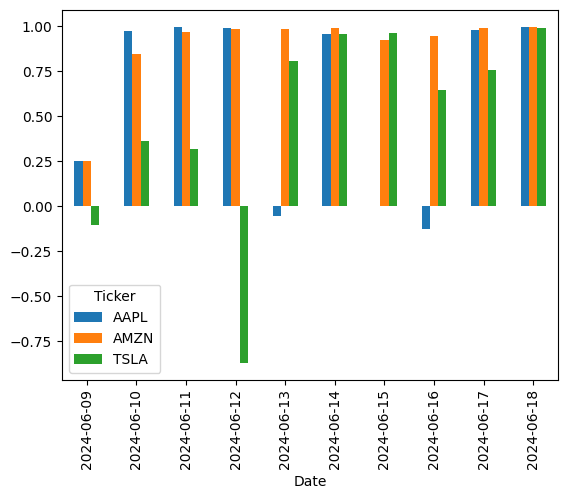

In [ ]:
# To visualize the average daily sentiment scores for each ticker a graph has been plotted using this code

plotdf = sorted_df.drop(sorted_df.iloc[:, 2:4], axis=1) # Dropping the unnecessary columns (News and Cleaned_news) from the DataFrame.

plt.figure(figsize=(12,14))

mean_df = plotdf.groupby(['Ticker', 'Date']).mean()  # we have Grouped the DataFrame by 'Ticker' and 'Date' and computed the mean of the sentiment scores.


mean_df = mean_df.unstack() # this has been used to Unstack the DataFrame to have 'Date' as the index and 'Ticker' as columns

mean_df = mean_df.xs('compound', axis="columns").transpose()

print(mean_df)
part_mean_df = mean_df.tail(10)

part_mean_df.plot(kind='bar') # defined the type of graph.

plt.show()

In [ ]:
df4 = pd.DataFrame(columns=['Ticker','Date','Open','High','Low','Close'])  # Described an empty DataFrame to store stock data.
l=[]

for stock in tickers_symbol:

  # Define the start and end dates for downloading stock data.
  start_date = '2005-01-01'
  end_date = date.today().strftime('%Y-%m-%d')

  stock_data = yf.download(stock, start=start_date, end=end_date) # Downloaded the stock data from Yahoo Finance using python library yfinance.

  stock_data.reset_index(inplace=True)
  stock_data.insert(0, "Ticker", stock, True) # To insert the new column 'Ticker'.
  df_final2 = pd.concat([df4,stock_data], ignore_index=True) # TO Concatenate the downloaded data with the final DataFrame .
  l.append(df_final2) # Dataframe for each ticker is stored in this list.

df_final3 = pd.concat([l[0],l[1],l[2]]) #TO Concatenate all 3 data frames present in the list.

df_final3.to_csv('/content/drive/My Drive/df_final3.csv')






In [ ]:
# Converting 'Date' column to datetime for both DataFrames

sorted_df['Date'] = pd.to_datetime(sorted_df['Date'])
df_final3['Date'] = pd.to_datetime(df_final3['Date'])

# Merging the DataFrames based on 'Date' and 'Ticker' columns
merged_data= df_final3.merge(sorted_df, how='inner', on=['Date','Ticker'])

merged_data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,News,Cleaned_News,compound
0,TSLA,2019-06-17,14.365333,15.133333,14.284667,15.002000,15.002000,184752000.0,After Elon Musk's tweets landed Tesla in hot w...,Elon Musk tweet land Tesla hot water SEC heavy...,0.0258
1,TSLA,2019-06-18,15.248000,15.649333,14.837333,14.982667,14.982667,190737000.0,"5 Top Stock Trades for Wednesday: BA, AVGO, ET...",5 Stock Trades Wednesday BA AVGO ETSY NIO AGN ...,-0.4588
2,TSLA,2019-06-19,15.007333,15.184667,14.737333,15.095333,15.095333,98626500.0,Chanos' Kynikos Associates long on Tesla put o...,Chanos Kynikos Associates long Tesla option Ma...,-0.5267
3,TSLA,2019-06-20,14.866667,15.126667,14.423333,14.641333,14.641333,177952500.0,Nasdaq Today: When Will We Get New Highs? Gold...,Nasdaq today New Highs Goldman slash Tesla pri...,-0.9062
4,TSLA,2019-06-21,14.414667,14.812000,14.366667,14.790667,14.790667,123031500.0,The One Metric That Makes Nio Stock a Loser Wo...,Metric make Nio Stock Loser Workers Tesla Buff...,-0.8934


In [ ]:
# Defined a function label which calculates labels based on the difference between the closing and opening prices.
def label(merged_data):
  if(merged_data['Close']-merged_data['Open']>=0):
    return(1)
  else:
    return(0)

merged_data['Label'] = merged_data.apply(label, axis=1)
merged_data.head()



,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,News,Cleaned_News,compound,Label
0,TSLA,2019-06-17,14.365333,15.133333,14.284667,15.002000,15.002000,184752000.0,After Elon Musk's tweets landed Tesla in hot w...,Elon Musk tweet land Tesla hot water SEC heavy...,0.0258,1
1,TSLA,2019-06-18,15.248000,15.649333,14.837333,14.982667,14.982667,190737000.0,"5 Top Stock Trades for Wednesday: BA, AVGO, ET...",5 Stock Trades Wednesday BA AVGO ETSY NIO AGN ...,-0.4588,0
2,TSLA,2019-06-19,15.007333,15.184667,14.737333,15.095333,15.095333,98626500.0,Chanos' Kynikos Associates long on Tesla put o...,Chanos Kynikos Associates long Tesla option Ma...,-0.5267,1
3,TSLA,2019-06-20,14.866667,15.126667,14.423333,14.641333,14.641333,177952500.0,Nasdaq Today: When Will We Get New Highs? Gold...,Nasdaq today New Highs Goldman slash Tesla pri...,-0.9062,0
4,TSLA,2019-06-21,14.414667,14.812000,14.366667,14.790667,14.790667,123031500.0,The One Metric That Makes Nio Stock a Loser Wo...,Metric make Nio Stock Loser Workers Tesla Buff...,-0.8934,1


In [ ]:
# FinBERT Features
os.environ['HF_TOKEN'] = 'COLAB'
finbert = BertModel.from_pretrained('yiyanghkust/finbert-tone')
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
def FinBERT_Features(text):
    Inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    Outputs = finbert(**Inputs)
    last_hidden_state = Outputs.last_hidden_state

    feature_vector = last_hidden_state.mean(dim=1).detach().numpy().flatten()
    return feature_vector

merged_data['FinBERT_Features'] = merged_data['News'].apply(FinBERT_Features)
merged_data.to_csv('/content/drive/My Drive/merged_data.csv')



In [ ]:
# Word2vec Features

merged_data = pd.read_csv('/content/drive/My Drive/merged_data.csv')
word2vec_model = api.load('word2vec-google-news-300')
def word2vec_features(text):
    words = text.split()
    word_vectors = [word2vec_model[word] for word in words if word in word2vec_model]
    if not word_vectors:
        return np.zeros(word2vec_model.vector_size)
    feature_vector = np.mean(word_vectors, axis=0)
    return feature_vector
merged_data['word2vec_Features'] = merged_data['News'].apply(word2vec_features)



In [ ]:
# GloVe Features

glove_model = api.load('glove-wiki-gigaword-300')

def Glove_features(text):
    words = text.split()
    word_vectors = [glove_model[word] for word in words if word in glove_model]
    if not word_vectors:  # If no words in the text are in the GloVe model, return a zero vector
        return np.zeros(glove_model.vector_size)
    feature_vector = np.mean(word_vectors, axis=0)
    return feature_vector

merged_data['GloVe_Features'] = merged_data['News'].apply(Glove_features)

Finbert_features_df = pd.DataFrame(merged_data['FinBERT_Features'].to_list(), columns=[f'FinBERT_{j}' for j in range(len(merged_data['FinBERT_Features'].iloc[0]))])
Word2vec_features_df = pd.DataFrame(merged_data['word2vec_Features'].to_list(), columns=[f'word2vec_{j}' for j in range(len(merged_data['word2vec_Features'].iloc[0]))])
Glove_features_df = pd.DataFrame(merged_data['GloVe_Features'].to_list(), columns=[f'GloVe_{j}' for j in range(len(merged_data['GloVe_Features'].iloc[0]))])
final_data_combined = pd.concat([merged_data,Word2vec_features_df, Finbert_features_df, Glove_features_df], axis=1)
final_data_combined.drop(['FinBERT_Features', 'GloVe_Features','word2vec_Features'], axis=1, inplace=True)

final_data_combined.to_csv('/content/drive/My Drive/final_data_combined.csv')






In [9]:
final_data_combined=pd.read_csv('/content/drive/My Drive/final_data_combined.csv')
final_data_combined.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1, inplace=True)


grouped_final = final_data_combined.groupby('Ticker')
dfs = {group: grouped_final.get_group(group) for group in grouped_final.groups}
grouped_final.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,News,Cleaned_News,...,GloVe_290,GloVe_291,GloVe_292,GloVe_293,GloVe_294,GloVe_295,GloVe_296,GloVe_297,GloVe_298,GloVe_299
0,TSLA,2019-06-13,14.025333,14.326667,13.834000,14.260667,14.260667,122524500.0,"U.S. denies Tesla, Uber 25% tariff relief on c...",U.S. deny Tesla Uber 25 tariff relief componen...,...,-0.262782,0.087496,-0.107372,0.103093,-0.251634,0.366925,-0.217893,-0.141026,0.242084,0.077837
1,TSLA,2019-06-14,14.083333,14.443333,14.026667,14.328000,14.328000,111501000.0,"Tariff, Consumer Challenges Are Priced Into GM...",tariff Consumer Challenges price GM Stock u.s....,...,-0.293643,0.033323,-0.148047,0.175206,-0.113990,0.318537,-0.273120,-0.139498,0.261043,0.149641
2,TSLA,2019-06-17,14.365333,15.133333,14.284667,15.002000,15.002000,184752000.0,After Elon Musk's tweets landed Tesla in hot w...,Elon Musk tweet land Tesla hot water SEC heavy...,...,-0.053160,-0.138778,-0.086436,0.027034,0.102300,0.181667,0.038362,-0.090106,-0.186626,0.036812
3,TSLA,2019-06-18,15.248000,15.649333,14.837333,14.982667,14.982667,190737000.0,"5 Top Stock Trades for Wednesday: BA, AVGO, ET...",5 Stock Trades Wednesday BA AVGO ETSY NIO AGN ...,...,-0.077619,-0.239173,-0.104042,0.086585,0.213415,0.387577,-0.071761,-0.278031,-0.174670,0.079958
4,TSLA,2019-06-19,15.007333,15.184667,14.737333,15.095333,15.095333,98626500.0,Chanos' Kynikos Associates long on Tesla put o...,Chanos Kynikos Associates long Tesla option Ma...,...,-0.210441,-0.110024,0.086763,-0.015011,0.081606,0.267109,-0.072242,-0.113423,-0.131736,0.089903
1262,AAPL,2013-03-01,15.642857,15.649286,15.356429,15.373929,13.207678,552448400.0,Judge throws out part of Apple patent award ag...,judge throw Apple patent award Samsung Judge t...,...,-0.003463,-0.160645,0.021542,0.110329,0.089828,0.346104,0.110592,-0.060444,-0.070748,-0.030057
1263,AAPL,2013-03-06,15.518214,15.544643,15.158214,15.202143,13.060094,460250000.0,Samsung gets a foot in at key Apple supplier S...,Samsung get foot key Apple supplier sharp $ 11...,...,-0.093136,-0.286986,-0.103508,0.155154,0.312107,0.410794,0.141331,-0.182627,-0.240439,0.020354
1264,AAPL,2013-03-07,15.160714,15.428929,15.037857,15.377857,13.211049,468473600.0,Analysis: Next Intel CEO to guide new business...,analysis Intel ceo guide new business maybe Ap...,...,-0.177809,-0.422942,-0.160975,-0.054510,0.229726,0.146205,-0.066227,-0.024905,0.025365,0.202322
1265,AAPL,2013-03-13,15.301786,15.517857,15.191429,15.298214,13.142627,405549200.0,"Trade panel delays decision on Apple, Samsung ...",trade panel delay decision Apple Samsung paten...,...,0.039974,-0.064265,0.046486,-0.059887,-0.105490,0.274757,-0.062817,-0.134968,-0.086157,-0.014438
1266,AAPL,2013-03-19,16.410713,16.463215,16.017857,16.231787,13.944651,526775200.0,"Samsung working on wristwatch, joins Apple: so...",Samsung work wristwatch join Apple source,...,-0.251260,-0.075590,-0.178280,-0.000694,-0.187245,0.259641,-0.084340,-0.114951,-0.306148,0.295100


In [10]:
# To store Data for each ticker in seperate dataframes.
tickers_symbol=['TSLA', 'AAPL', 'AMZN']

df_A = dfs[tickers_symbol[0]]
df_B = dfs[tickers_symbol[1]]
df_C = dfs[tickers_symbol[2]]

df_A.to_csv('/content/drive/My Drive/df_A.csv')

df_B.to_csv('/content/drive/My Drive/df_B.csv')

df_C.to_csv('/content/drive/My Drive/df_C.csv')

df_A.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,News,Cleaned_News,...,GloVe_290,GloVe_291,GloVe_292,GloVe_293,GloVe_294,GloVe_295,GloVe_296,GloVe_297,GloVe_298,GloVe_299
0,TSLA,2019-06-13,14.025333,14.326667,13.834000,14.260667,14.260667,122524500.0,"U.S. denies Tesla, Uber 25% tariff relief on c...",U.S. deny Tesla Uber 25 tariff relief componen...,...,-0.262782,0.087496,-0.107372,0.103093,-0.251634,0.366925,-0.217893,-0.141026,0.242084,0.077837
1,TSLA,2019-06-14,14.083333,14.443333,14.026667,14.328000,14.328000,111501000.0,"Tariff, Consumer Challenges Are Priced Into GM...",tariff Consumer Challenges price GM Stock u.s....,...,-0.293643,0.033323,-0.148047,0.175206,-0.113990,0.318537,-0.273120,-0.139498,0.261043,0.149641
2,TSLA,2019-06-17,14.365333,15.133333,14.284667,15.002000,15.002000,184752000.0,After Elon Musk's tweets landed Tesla in hot w...,Elon Musk tweet land Tesla hot water SEC heavy...,...,-0.053160,-0.138778,-0.086436,0.027034,0.102300,0.181667,0.038362,-0.090106,-0.186626,0.036812
3,TSLA,2019-06-18,15.248000,15.649333,14.837333,14.982667,14.982667,190737000.0,"5 Top Stock Trades for Wednesday: BA, AVGO, ET...",5 Stock Trades Wednesday BA AVGO ETSY NIO AGN ...,...,-0.077619,-0.239173,-0.104042,0.086585,0.213415,0.387577,-0.071761,-0.278031,-0.174670,0.079958
4,TSLA,2019-06-19,15.007333,15.184667,14.737333,15.095333,15.095333,98626500.0,Chanos' Kynikos Associates long on Tesla put o...,Chanos Kynikos Associates long Tesla option Ma...,...,-0.210441,-0.110024,0.086763,-0.015011,0.081606,0.267109,-0.072242,-0.113423,-0.131736,0.089903


In [11]:
# Defined a list to store all 3 data frames.
N=[]
N.append(df_A)
N.append(df_B)
N.append(df_C)

In [12]:
# Defined the getSubjectivity and getPolarity functions to calculate the subjectivity and polarity scores of a given text.
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity


In [ ]:

for df3 in N:


  # Here we ApplIED the getPolarity and getSubjectivity functions to the 'News' column OF THE DATAFRAME.
  df3.loc[:, 'Polarity'] = df3['Cleaned_News'].apply(getPolarity)
  df3.loc[:, 'Subjectivity'] = df3['Cleaned_News'].apply(getSubjectivity)


In [ ]:
# FIRST we define the getSIA function to analyze sentiment using VADER
def getSIA(text):
  SIA= SentimentIntensityAnalyzer()
  sentiment= SIA.polarity_scores(text)
  return sentiment
# we apply 'for' Loop  for each DataFrame in the list N
for i in range(len(N)):
  negative=[]
  neutral=[]
  positive=[]
  sia=0

  for j in range(len(N[i])): # for each row in a dataframe.
    sia = getSIA(N[i].iloc[j]['Cleaned_News'])
    negative.append(sia['neg'])
    neutral.append(sia['neu'])
    positive.append(sia['pos'])
 # To add  new columns for negative, neutral, and positive sentiment scores to each DataFrame.
  N[i].loc[:, 'negative'] = negative
  N[i].loc[:, 'neutral'] = neutral
  N[i].loc[:, 'positive'] = positive







In [15]:

final_data2 = []
final_data = []

# Here we defined the columns we require in a list.
final = ['Open', 'High', 'Low', 'Close', 'Volume', 'Polarity', 'Subjectivity', 'negative', 'neutral', 'positive', 'Label','Adj Close']


for i in range(len(N)):
    final_dataset1 = N[i][final]
    final_dataset2 = N[i].drop(columns=['Ticker','News', 'Cleaned_News', 'Date', 'Close','High','Low'])
    final_data.append(final_dataset1)
    final_data2.append(final_dataset2)
# Print the processed DataFrames
for i, df_processed in enumerate(final_data2):
    print(f"Processed DataFrame {i+1}:")
    print(df_processed)
    print()








Processed DataFrame 1:
            Open   Adj Close       Volume  compound  Label  word2vec_0  \
0      14.025333   14.260667  122524500.0    0.4455      1    0.026820   
1      14.083333   14.328000  111501000.0   -0.4927      1    0.019958   
2      14.365333   15.002000  184752000.0   -0.4588      1    0.081211   
3      15.248000   14.982667  190737000.0   -0.4588      0   -0.008779   
4      15.007333   15.095333   98626500.0   -0.5267      1    0.042267   
...          ...         ...          ...       ...    ...         ...   
1257  173.919998  170.660004   64761900.0    0.3182      0    0.052993   
1258  171.119995  177.289993   90389400.0   -0.8689      1    0.047511   
1259  188.389999  182.470001  118984100.0    0.8091      0    0.047425   
1260  185.800003  178.009995   82038200.0    0.9906      0    0.054252   
1261  177.919998  187.440002  109028900.0    0.8402      1    0.028479   

      word2vec_1  word2vec_2  word2vec_3  word2vec_4  ...  GloVe_295  \
0      -0.049993

 Graph for TSLA


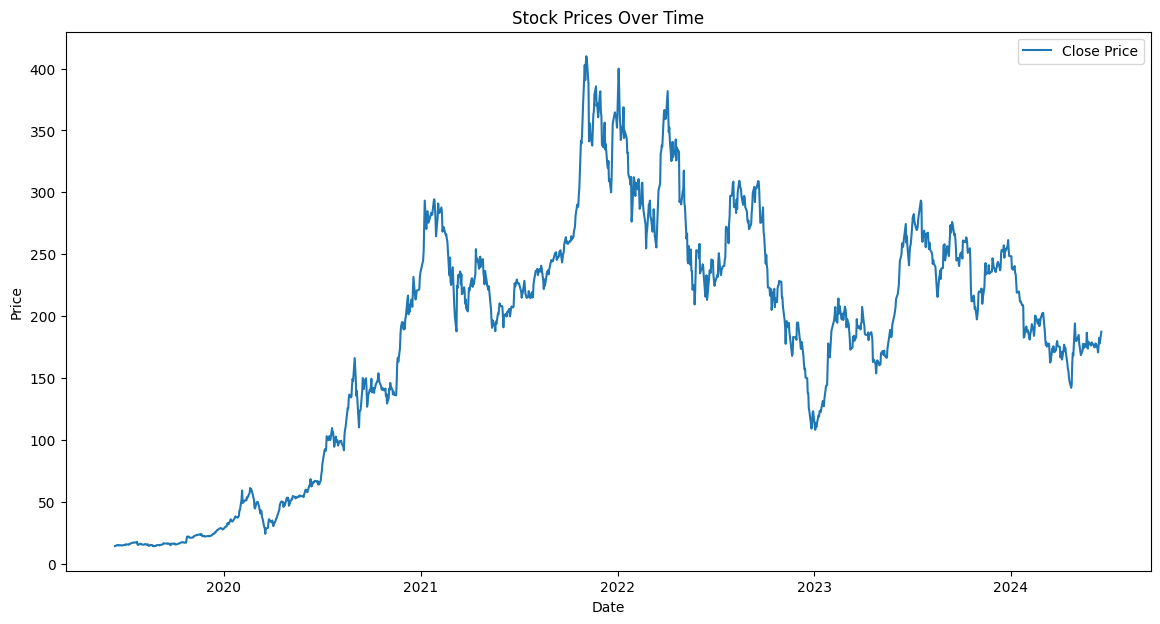

 Graph for AAPL


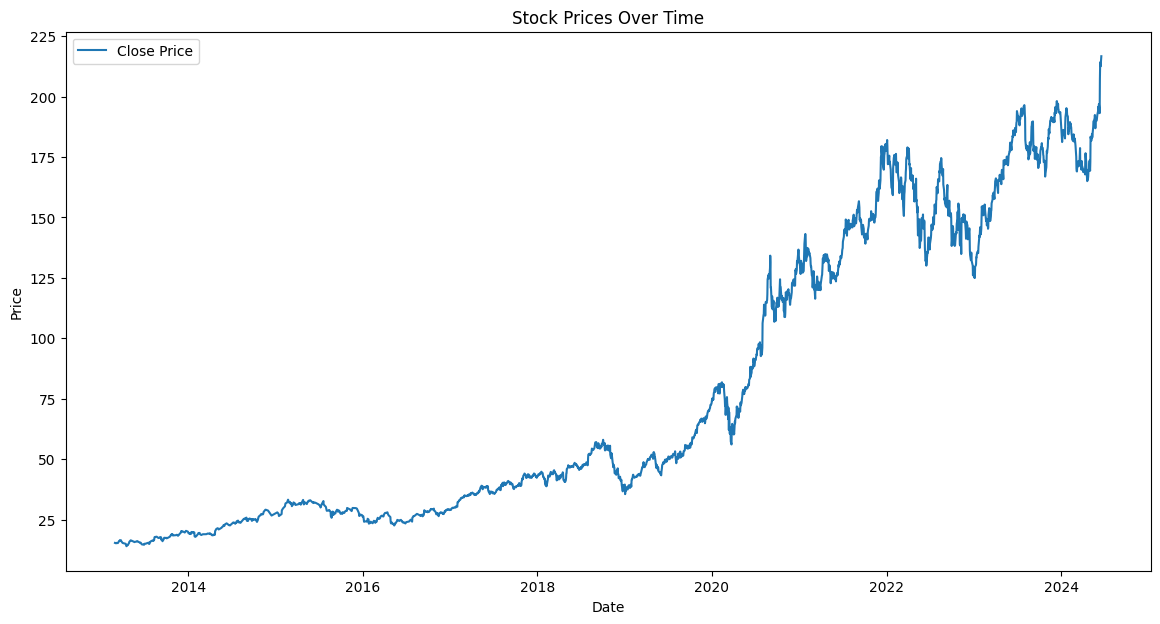

 Graph for AMZN


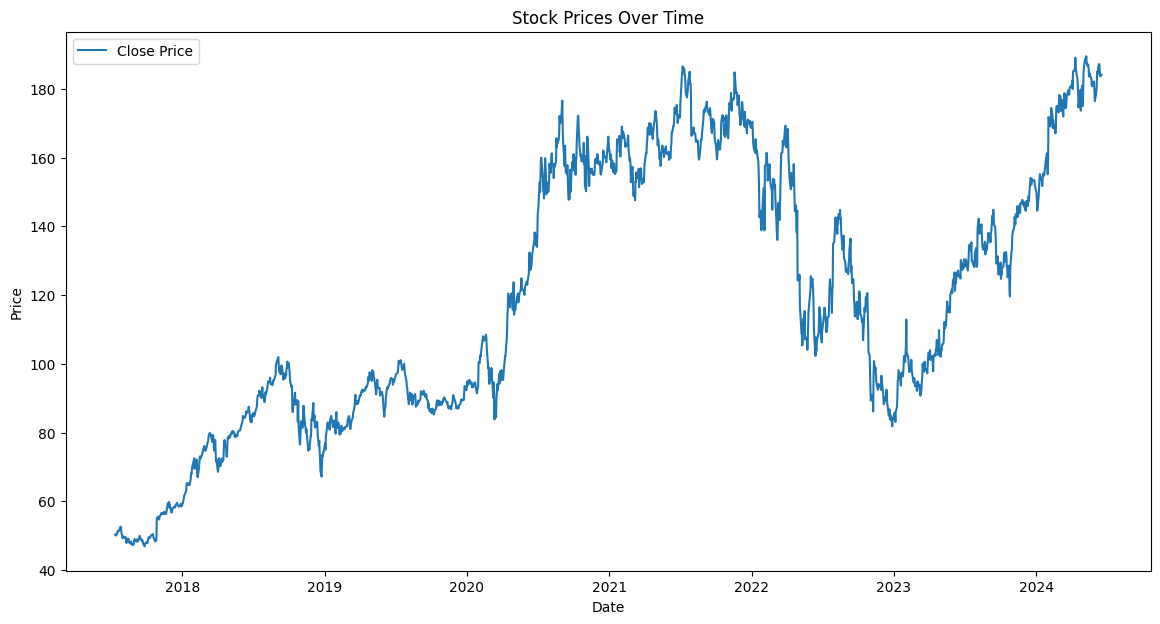

In [23]:
# this graph shows the movement in the stock price for a period of time.
p=0
for Df in N:
  print(" Graph for", tickers_symbol[p])
  p+=1
  subset_df = Df.tail(3000)

  subset_df.loc[:, 'Date'] = pd.to_datetime(subset_df['Date'])

  plt.figure(figsize=(14, 7))
  plt.plot(subset_df['Date'], subset_df['Close'], label='Close Price')
  plt.title('Stock Prices Over Time')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  plt.show()




 Graph for TSLA


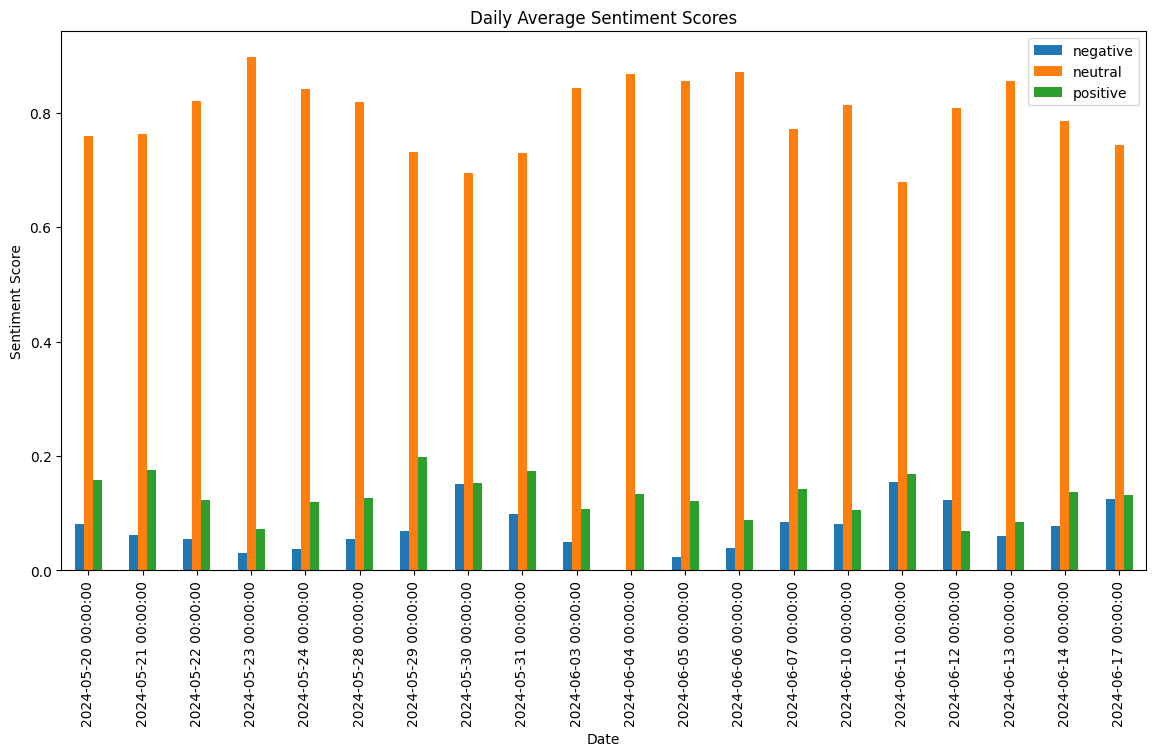

 Graph for AAPL


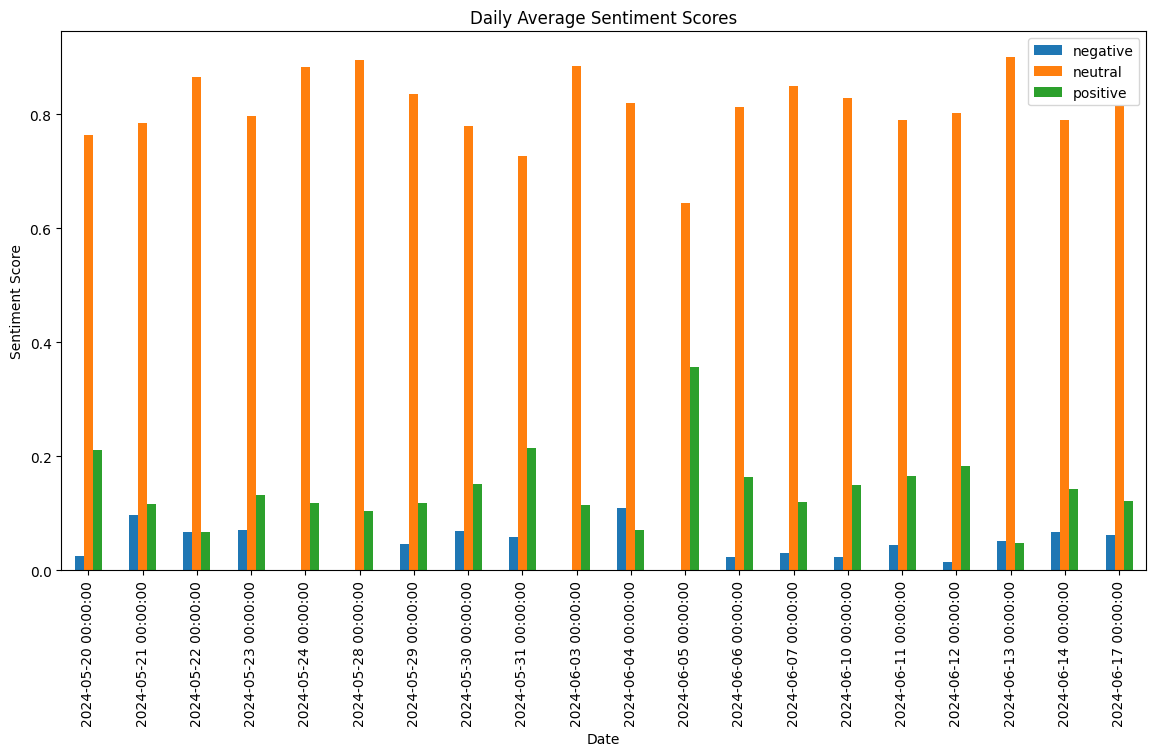

 Graph for AMZN


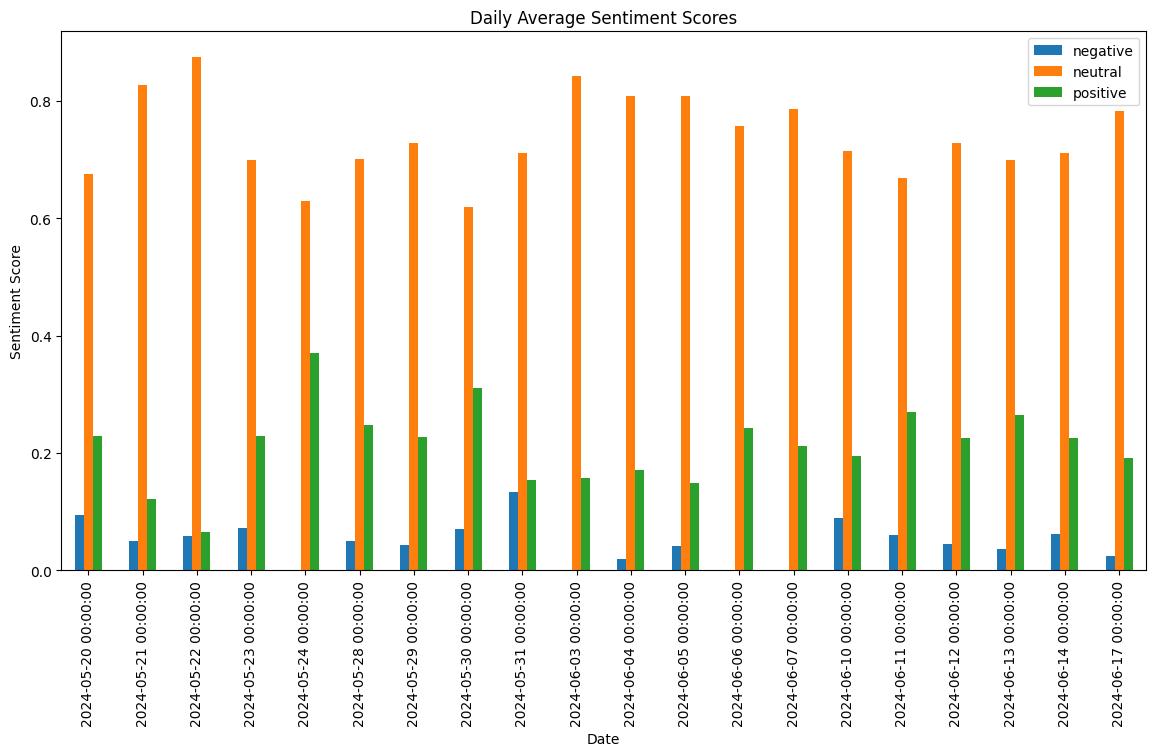

In [ ]:
# this graph shows how stock news sentiments have varied for last 20 days.
q=0
for df in N:
  print(" Graph for", tickers_symbol[q])
  q+=1
  subset_df = df.tail(20)
  daily_sentiment = subset_df.groupby('Date')[['negative', 'neutral', 'positive']].mean()

  daily_sentiment.plot(kind='bar', figsize=(14, 7))
  plt.title('Daily Average Sentiment Scores')
  plt.xlabel('Date')
  plt.ylabel('Sentiment Score')
  plt.show()


 Graph for TSLA


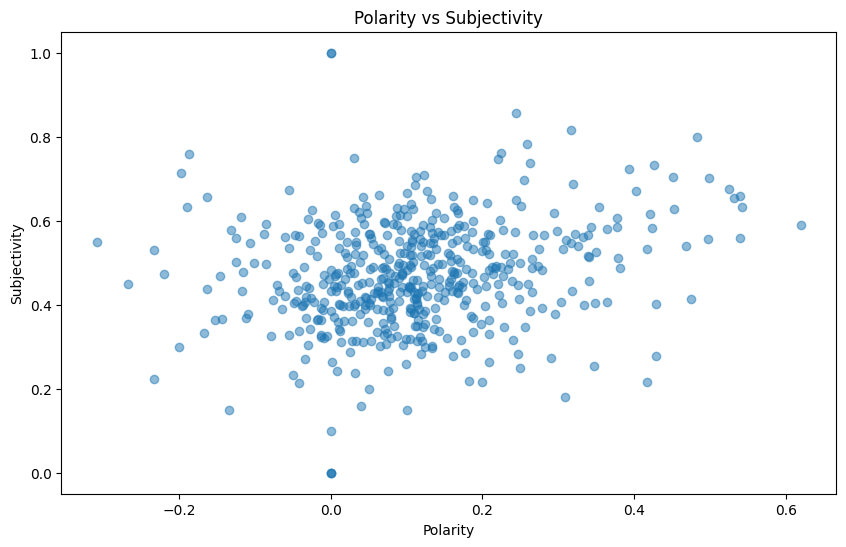

 Graph for AAPL


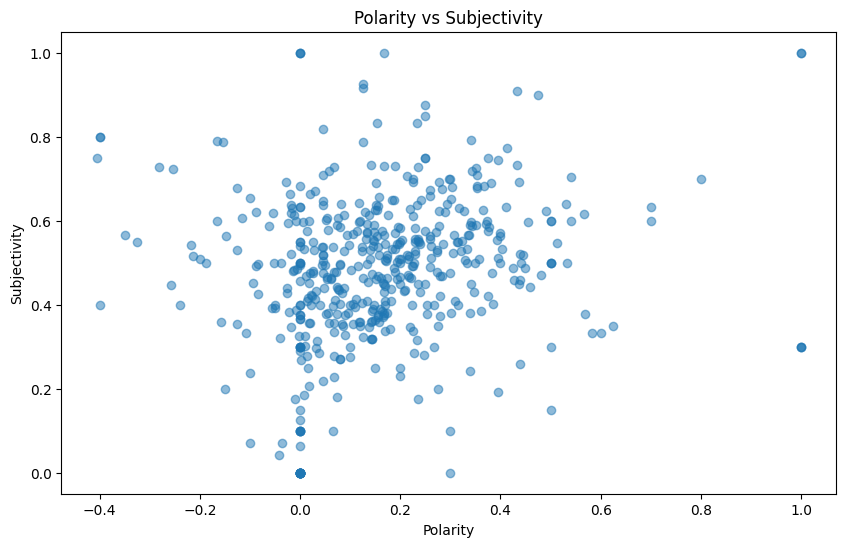

 Graph for AMZN


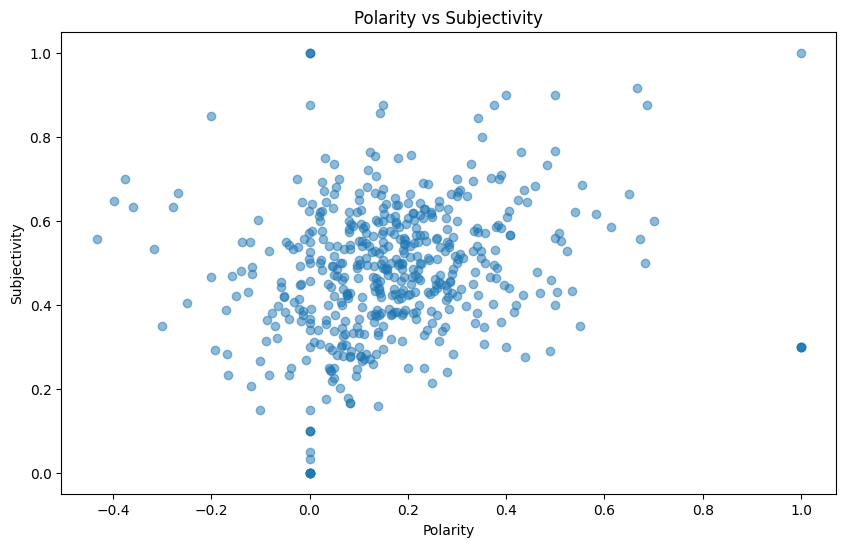

In [ ]:
# to show the relationship between Polarity and Subjectivity.
r=0
for Df in N:
  print(" Graph for", tickers_symbol[r])
  r+=1
  subset_df = Df.tail(500)
  plt.figure(figsize=(10, 6))
  plt.scatter(subset_df['Polarity'], subset_df['Subjectivity'], alpha=0.5)
  plt.title('Polarity vs Subjectivity')
  plt.xlabel('Polarity')
  plt.ylabel('Subjectivity')
  plt.show()



 Graph for TSLA


<Figure size 1400x700 with 0 Axes>

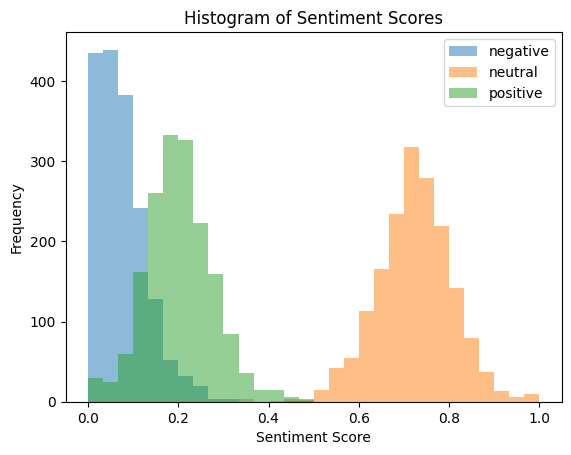

 Graph for AAPL


<Figure size 1400x700 with 0 Axes>

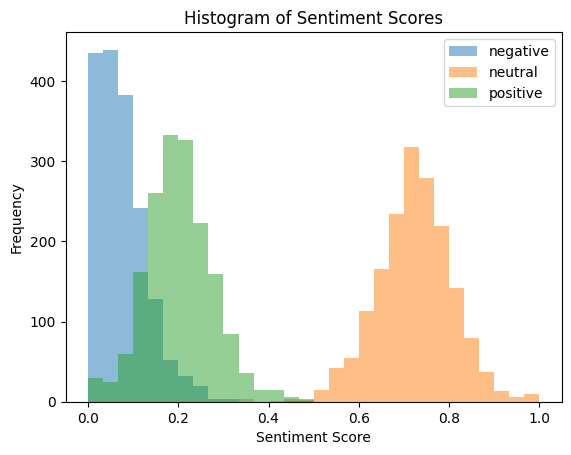

 Graph for AMZN


<Figure size 1400x700 with 0 Axes>

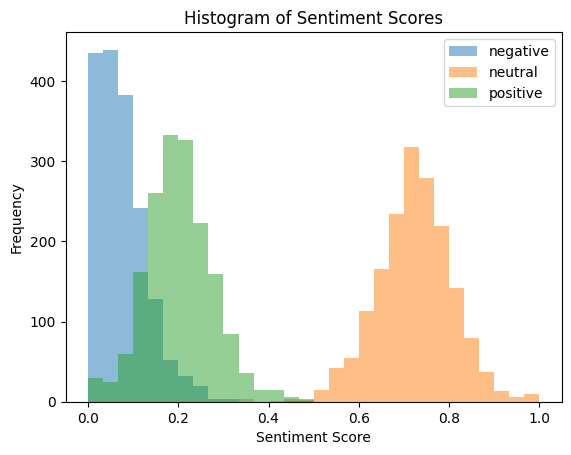

In [ ]:
# to show the distribution of sentiment scores of stock news.
s=0
for df in N:
  print(" Graph for", tickers_symbol[s])
  s+=1
  subset_df = Df.tail(2000)
  plt.figure(figsize=(14, 7))
  subset_df[['negative', 'neutral', 'positive']].plot(kind='hist', bins=30, alpha=0.5)
  plt.title('Histogram of Sentiment Scores')
  plt.xlabel('Sentiment Score')
  plt.ylabel('Frequency')
  plt.show()


 Graph for TSLA


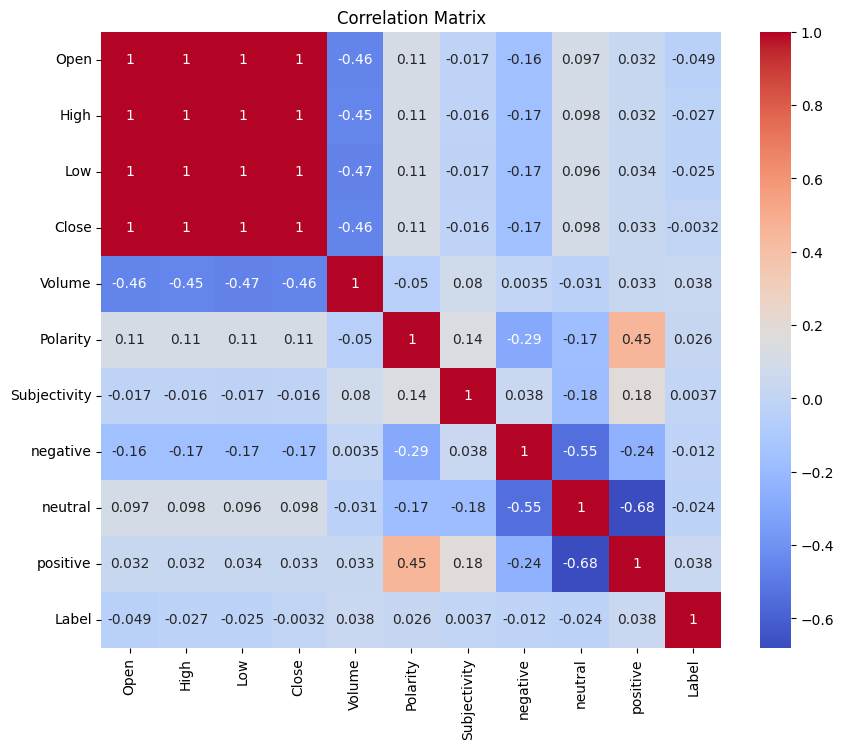

 Graph for AAPL


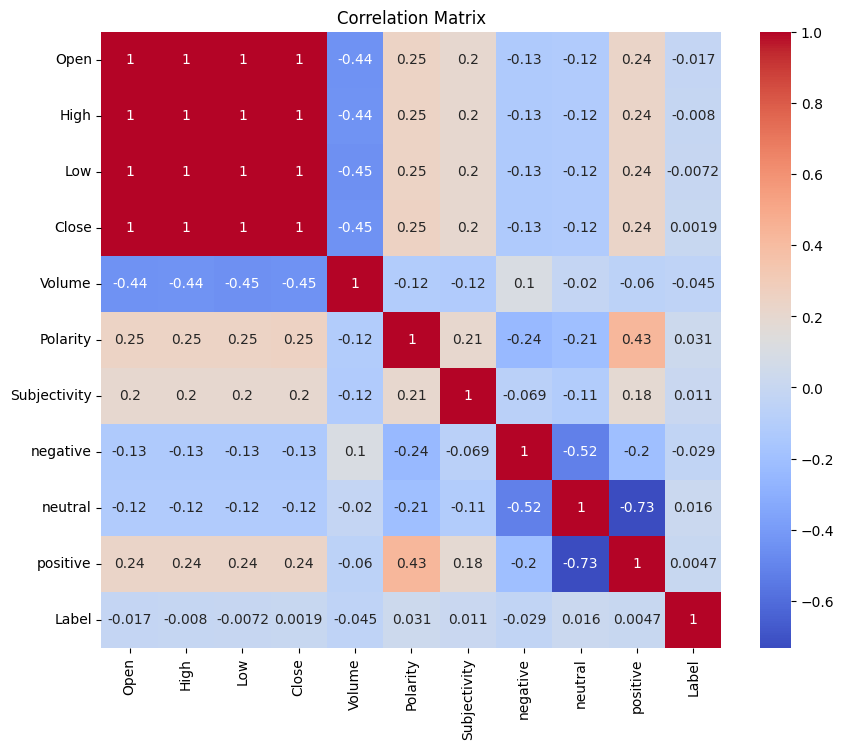

 Graph for AMZN


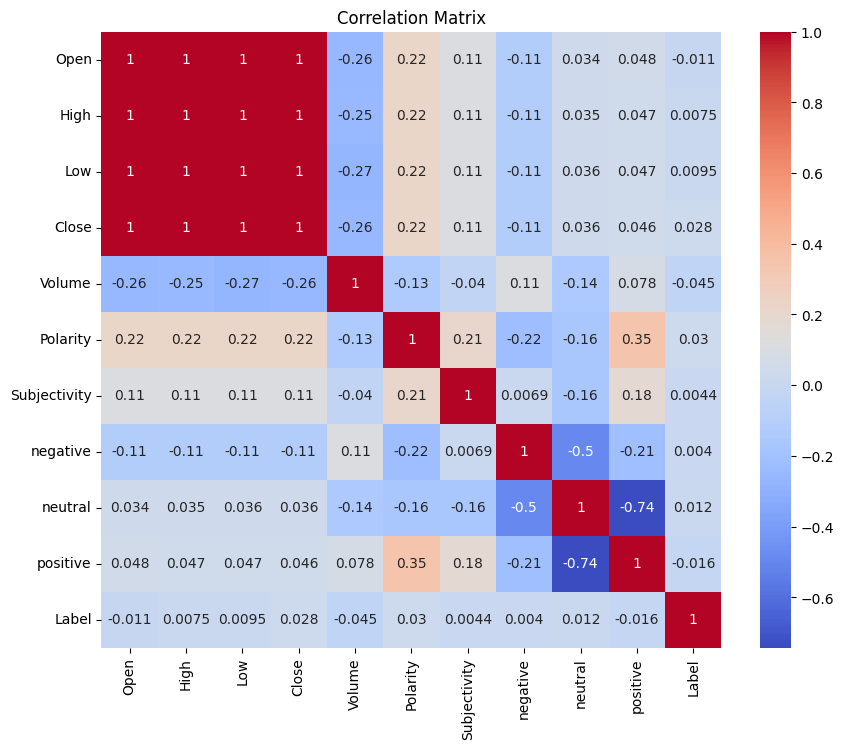

In [ ]:
#to show the correlation heatmaps for each company.
t=0
for df in final_data:
  print(" Graph for", tickers_symbol[t])
  t+=1
  subset_df = df.tail(2000)
  plt.figure(figsize=(10, 8))
  correlation_matrix = subset_df.corr()
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
  plt.title('Correlation Matrix')
  plt.show()


 Graph for TSLA


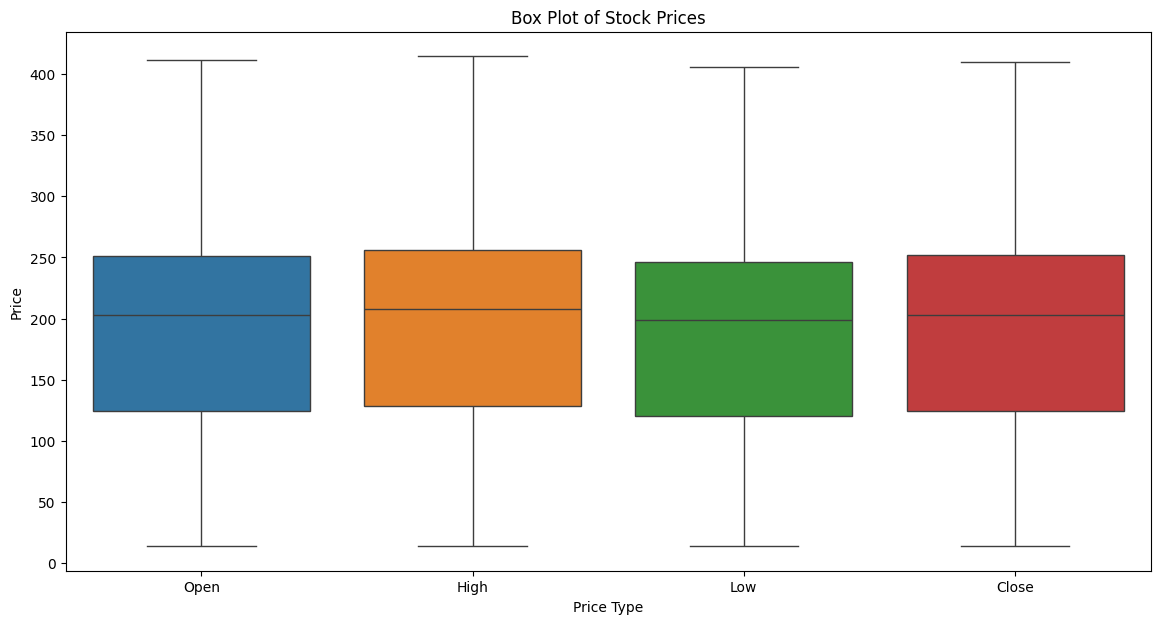

 Graph for AAPL


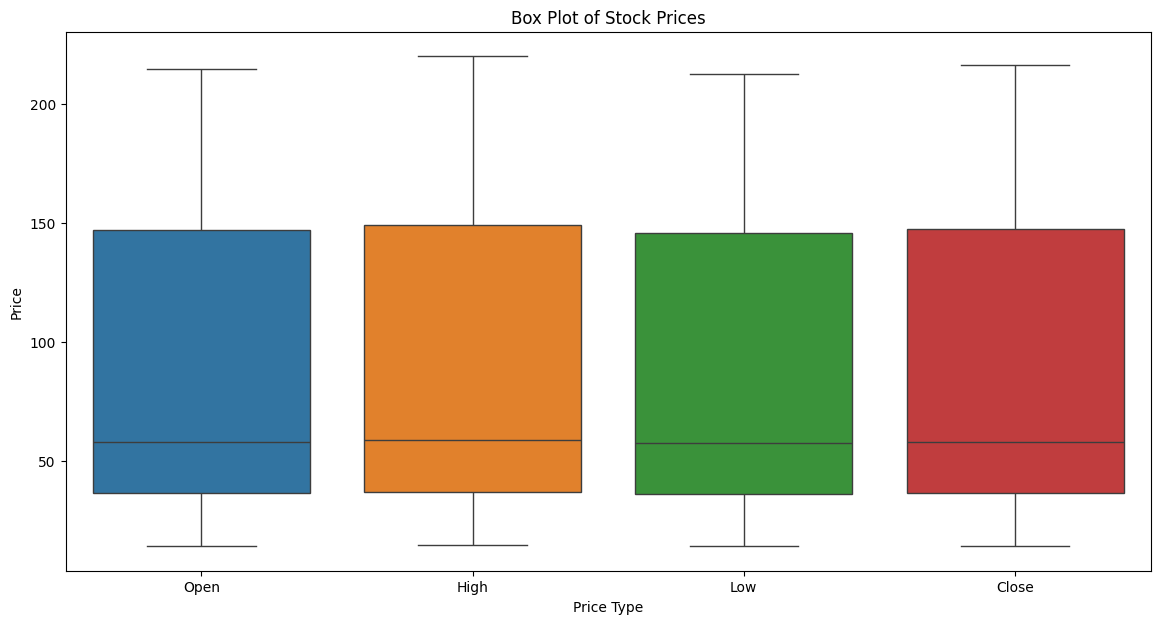

 Graph for AMZN


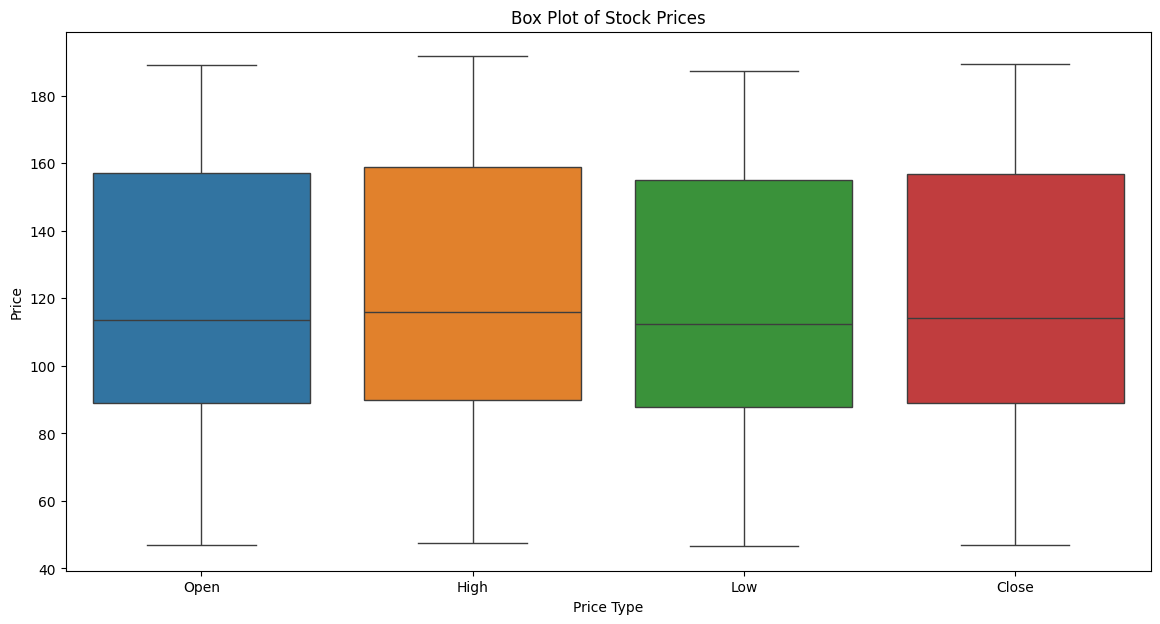

In [ ]:
# to show the box plot for the Open, High, Low, and Close prices.
u=0
for df in final_data:
  print(" Graph for", tickers_symbol[u])
  u+=1
  subset_df = df.tail(3000)
  plt.figure(figsize=(14, 7))
  sns.boxplot(data=subset_df[['Open', 'High', 'Low', 'Close']])
  plt.title('Box Plot of Stock Prices')
  plt.xlabel('Price Type')
  plt.ylabel('Price')
  plt.show()



 Graph for TSLA


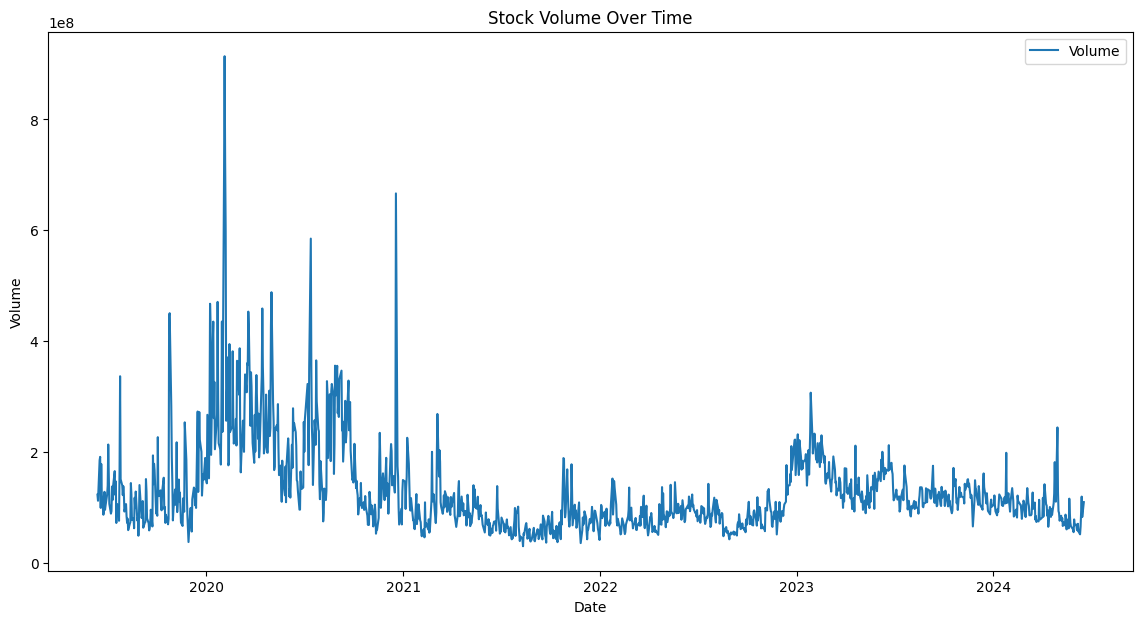

 Graph for AAPL


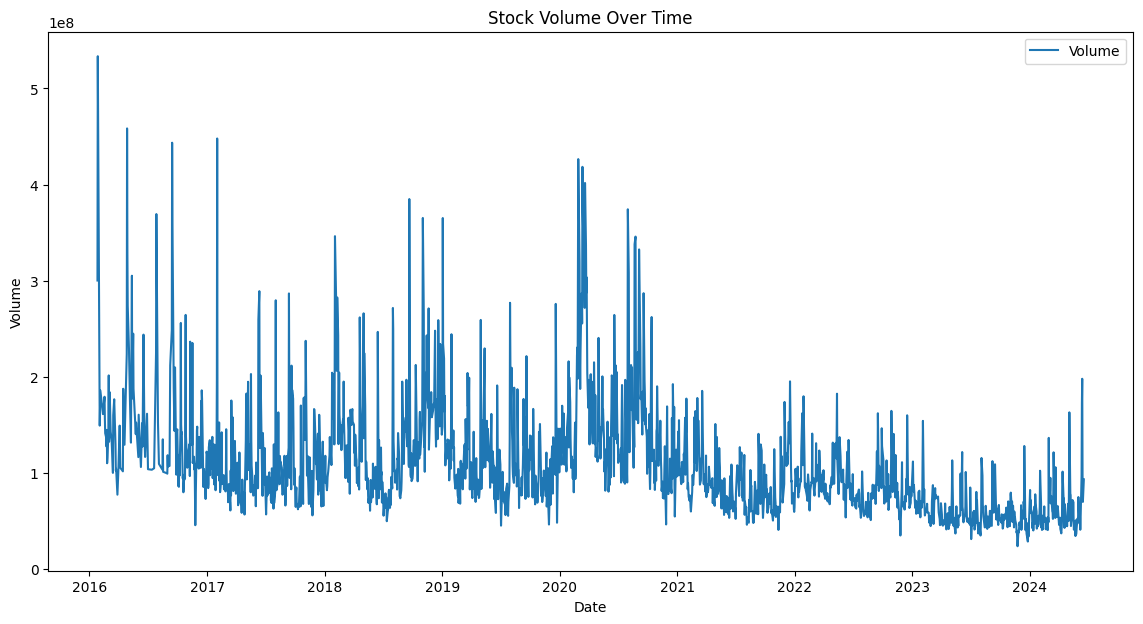

 Graph for AMZN


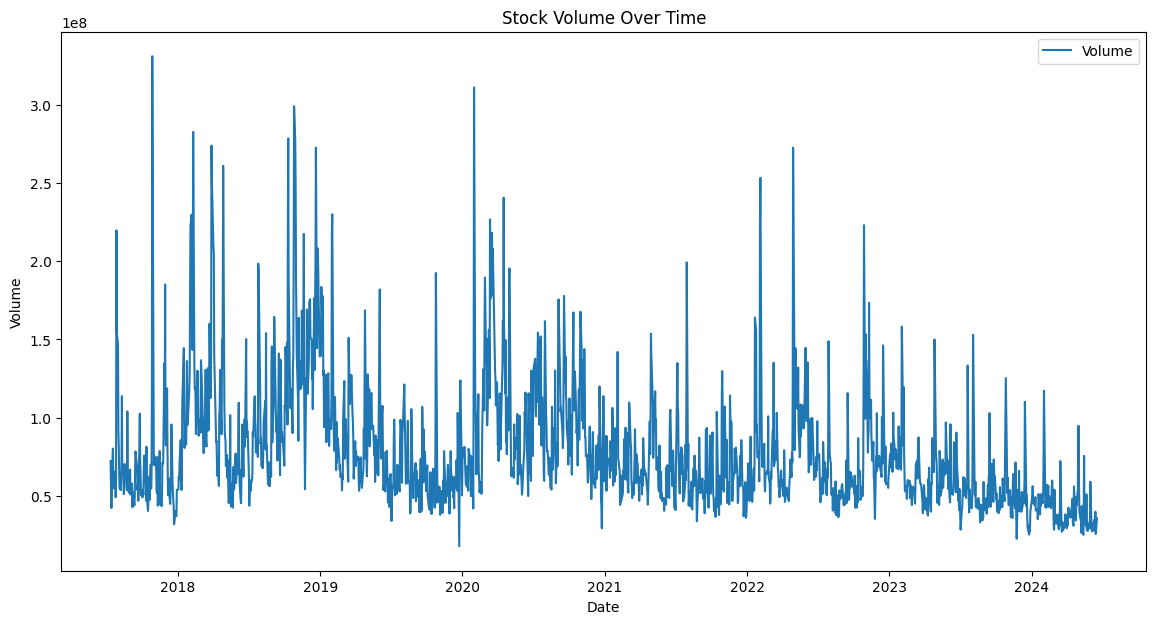

In [ ]:
# to show the line plot to visualize the stock volume over time.
v=0
for df in N:
  print(" Graph for", tickers_symbol[v])
  v+=1
  subset_df = df.tail(2000)
  plt.figure(figsize=(14, 7))
  plt.plot(subset_df['Date'], subset_df['Volume'], label='Volume')
  plt.title('Stock Volume Over Time')
  plt.xlabel('Date')
  plt.ylabel('Volume')
  plt.legend()
  plt.show()


 Graph for TSLA


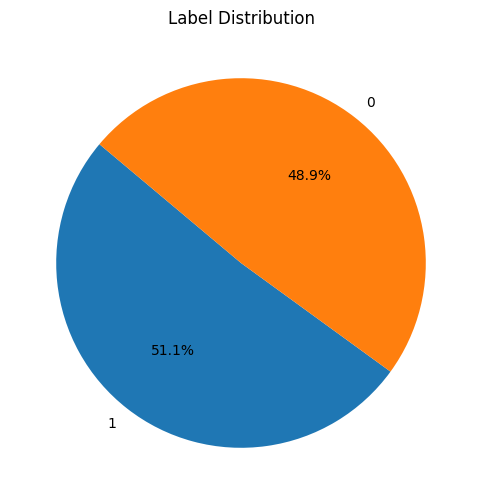

 Graph for AAPL


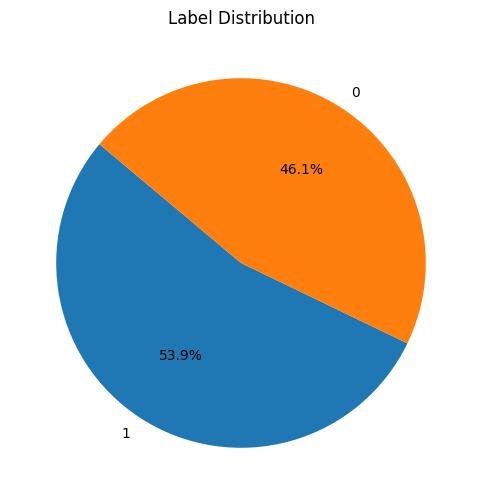

 Graph for AMZN


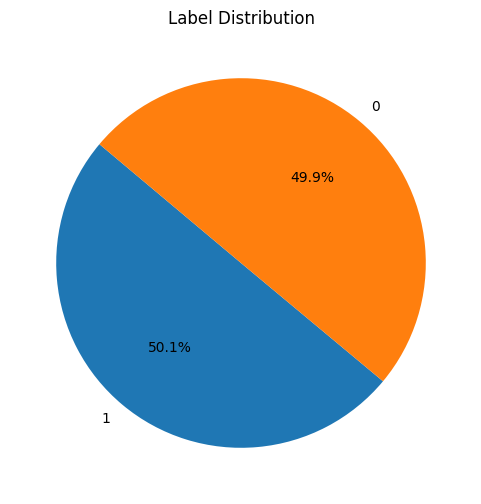

In [ ]:
# TO show the label distribution using pie chart.
z=0
for df in final_data:
  print(" Graph for", tickers_symbol[z])
  z+=1
  subset_df = df.tail(2000)
  label_counts = subset_df['Label'].value_counts()

  plt.figure(figsize=(6, 6))
  plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
  plt.title('Label Distribution')
  plt.show()


In [ ]:
# Basic model for Linear Discriminant Analysis.
a=0
for Data_set in final_data2:
  print(" Results for", tickers_symbol[a])
  x= Data_set
  x= np.array(x.drop(['Label'],axis=1))
  y= np.array(Data_set['Label'])
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

  LDA = LinearDiscriminantAnalysis()

  LDA.fit(x_train,y_train)
  y_pred= LDA.predict(x_test)

  print("Accuracy score=",accuracy_score(y_test,y_pred))
  print("Classification report")
  print(classification_report(y_test,y_pred))
  a+=1




 Results for TSLA
Accuracy score= 0.5059288537549407
Classification report
              precision    recall  f1-score   support

           0       0.50      0.49      0.49       124
           1       0.52      0.52      0.52       129

    accuracy                           0.51       253
   macro avg       0.51      0.51      0.51       253
weighted avg       0.51      0.51      0.51       253

 Results for AAPL
Accuracy score= 0.6268656716417911
Classification report
              precision    recall  f1-score   support

           0       0.58      0.64      0.60       210
           1       0.68      0.62      0.65       259

    accuracy                           0.63       469
   macro avg       0.63      0.63      0.63       469
weighted avg       0.63      0.63      0.63       469

 Results for AMZN
Accuracy score= 0.5114942528735632
Classification report
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       181
           1

In [ ]:
# Basic model for Random Forest Classifier.
b=0
for dataset in final_data2:
    print(" Results for", tickers_symbol[b])
    x = np.array(dataset.drop(['Label'], axis=1))
    y = np.array(dataset['Label'])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    rf = RandomForestClassifier(random_state=0)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)

    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    b+=1

 Results for TSLA
Accuracy Score: 0.48616600790513836
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.48       124
           1       0.50      0.48      0.49       129

    accuracy                           0.49       253
   macro avg       0.49      0.49      0.49       253
weighted avg       0.49      0.49      0.49       253

 Results for AAPL
Accuracy Score: 0.5522388059701493
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       210
           1       0.59      0.61      0.60       259

    accuracy                           0.55       469
   macro avg       0.55      0.55      0.55       469
weighted avg       0.55      0.55      0.55       469

 Results for AMZN
Accuracy Score: 0.47126436781609193
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       181
       

In [ ]:
# Basic model for XGBoost.
c=0
for data in final_data2:
  print(" Results for", tickers_symbol[c])
  c+=1
  x = data.drop(['Label'], axis=1)
  y = data['Label']

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  xgb_model = xgb.XGBClassifier()

  xgb_model.fit(x_train, y_train)

  y_pred = xgb_model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)

  print("Accuracy:", accuracy)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))





 Results for TSLA
Accuracy: 0.5177865612648221
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.46      0.48       124
           1       0.52      0.57      0.55       129

    accuracy                           0.52       253
   macro avg       0.52      0.52      0.52       253
weighted avg       0.52      0.52      0.52       253

 Results for AAPL
Accuracy: 0.5223880597014925
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.42      0.44       210
           1       0.56      0.61      0.58       259

    accuracy                           0.52       469
   macro avg       0.51      0.51      0.51       469
weighted avg       0.52      0.52      0.52       469

 Results for AMZN
Accuracy: 0.5201149425287356
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       181
           1       0.50    

In [ ]:
# Basic model for logistic regression.
d=0
for data in final_data2:

  print(" Results for", tickers_symbol[d])
  X=data.drop(['Label'],axis=1)
  y=data['Label']
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
  model1=LogisticRegression()
  model1.fit(X_train,y_train)

  y_pred=model1.predict(X_test)

  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, zero_division=1))
  d+=1

 Results for TSLA
0.5098814229249012
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       124
           1       0.51      1.00      0.68       129

    accuracy                           0.51       253
   macro avg       0.75      0.50      0.34       253
weighted avg       0.75      0.51      0.34       253

 Results for AAPL
0.5522388059701493
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       210
           1       0.55      1.00      0.71       259

    accuracy                           0.55       469
   macro avg       0.78      0.50      0.36       469
weighted avg       0.75      0.55      0.39       469

 Results for AMZN
0.5201149425287356
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       181
           1       1.00      0.00      0.00       167

    accuracy                           0.52       348
   macro avg     

In [ ]:
# Basic model for SVM.

for dataset in final_data2:
    x = dataset.drop(['Label'], axis=1).values
    y = dataset['Label'].values

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    svm_model = SVC(probability=True, random_state=0)
    svm_model.fit(x_train, y_train)
    y_pred = svm_model.predict(x_test)
    y_prob = svm_model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy Score:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

Accuracy Score: 0.4901185770750988
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.44      0.46       124
           1       0.50      0.54      0.52       129

    accuracy                           0.49       253
   macro avg       0.49      0.49      0.49       253
weighted avg       0.49      0.49      0.49       253

Accuracy Score: 0.55863539445629
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.14      0.22       210
           1       0.56      0.90      0.69       259

    accuracy                           0.56       469
   macro avg       0.55      0.52      0.46       469
weighted avg       0.55      0.56      0.48       469

Accuracy Score: 0.4827586206896552
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.25      0.34       181
           1       0.47      0.73      0.58       167

    accura

In [18]:

import warnings
warnings.filterwarnings("ignore")

e=0
for dataset in final_data2:
  print(" Results for", tickers_symbol[e])

  x = dataset.drop(['Label'], axis=1).values
  y = dataset['Label'].values

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  param_grid={
      'C': [0.01, 0.1, 1, 10, 100],
      'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'max_iter': [100, 200, 300]
      }
  model = LogisticRegression()
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
  grid_search.fit(x_train, y_train)
  print("Best parameters found: ", grid_search.best_params_)


  best_logreg = grid_search.best_estimator_

  y_pred = best_logreg.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy Score:", accuracy)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  e+=1


 Results for TSLA
Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found:  {'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg'}
Accuracy Score: 0.9407114624505929
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       124
           1       0.93      0.95      0.94       129

    accuracy                           0.94       253
   macro avg       0.94      0.94      0.94       253
weighted avg       0.94      0.94      0.94       253

 Results for AAPL
Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters found:  {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
Accuracy Score: 0.8230277185501066
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       210
           1       0.85      0.83      0.84       259

    accuracy                           0.82       469
   macro avg       0.82     

In [22]:

e=0
for dataset in final_data2:
  print(" Results for", tickers_symbol[e])

  x = dataset.drop(['Label'], axis=1).values
  y = dataset['Label'].values

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  param_grid = param_grid_rf = {'n_estimators': [200],'max_depth': [20],
                 'min_samples_split': [5],'min_samples_leaf': [2],'bootstrap': [False]}
  model = RandomForestClassifier(random_state=42)
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)
  grid_search.fit(x_train, y_train)
  print("Best parameters found: ", grid_search.best_params_)

  best_rf = grid_search.best_estimator_

  y_pred = best_rf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy Score:", accuracy)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  e+=1


 Results for TSLA
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy Score: 0.5019762845849802
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.44      0.46       124
           1       0.51      0.57      0.54       129

    accuracy                           0.50       253
   macro avg       0.50      0.50      0.50       253
weighted avg       0.50      0.50      0.50       253

 Results for AAPL
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy Score: 0.5394456289978679
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.40      0.43       210
           1       0.57      0.66 

In [29]:

e=0
Best_parameter={}
for dataset in final_data2:
  x = dataset.drop(['Label'], axis=1).values
  y = dataset['Label'].values

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  print(" Results for", tickers_symbol[e])
  xgb_param_grid = {'subsample': [0.6], 'n_estimators': [100], 'max_depth': [4], 'learning_rate': [0.049770235643321115], 'gamma': [4], 'colsample_bytree': [0.7]}

  xgb_model = xgb.XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='mlogloss')

  grid_search = GridSearchCV(estimator= xgb_model,param_grid=xgb_param_grid,cv=3,scoring='accuracy',verbose=2,n_jobs=-1)

  grid_search.fit(x_train, y_train)
  best_xgb = grid_search.best_estimator_


  print("Best parameters of XGBoost are ",grid_search.best_params_)
  y_pred = best_xgb.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy Score:", accuracy)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))




 Results for TSLA
Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters of XGBoost are  {'colsample_bytree': 0.7, 'gamma': 4, 'learning_rate': 0.049770235643321115, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.6}
Accuracy Score: 0.5177865612648221
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.49       124
           1       0.53      0.56      0.54       129

    accuracy                           0.52       253
   macro avg       0.52      0.52      0.52       253
weighted avg       0.52      0.52      0.52       253

 Results for TSLA
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters of XGBoost are  {'colsample_bytree': 0.7, 'gamma': 4, 'learning_rate': 0.049770235643321115, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.6}
Accuracy Score: 0.5309168443496801
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.41      0.44       210
           1       0.57      0.63      0.60

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
e=0
Best_parameter={}
for dataset in final_data2:
  x = dataset.drop(['Label'], axis=1).values
  y = dataset['Label'].values

  scaler = StandardScaler()
  x_scaled = scaler.fit_transform(x)

  pca = PCA(n_components=min(len(x_scaled), len(x_scaled[0])) - 1)  # keep it lower than min(n_samples, n_features)
  x_pca = pca.fit_transform(x_scaled)


  x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

  param_grid ={'solver': ['lsqr','eigen'], 'shrinkage': [ None, 0.1,0.5,1.0]}
  grid_search = GridSearchCV(estimator=LinearDiscriminantAnalysis(),
                            param_grid=param_grid,
                            cv=3,
                            scoring='accuracy',
                            verbose=2,
                            n_jobs=-1)

  grid_search.fit(x_train, y_train)

  print(f'Best parameters: {grid_search.best_params_}')
  print(f'Best score: {grid_search.best_score_}')
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(x_test)
  print(f'LDA Accuracy: {accuracy_score(y_test, y_pred)}')
  print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 463, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/lib/python3.10/dist-packages

Best parameters: {'shrinkage': 0.1, 'solver': 'lsqr'}
Best score: 0.5391261598605812
LDA Accuracy: 0.5375494071146245
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       124
           1       0.54      0.57      0.56       129

    accuracy                           0.54       253
   macro avg       0.54      0.54      0.54       253
weighted avg       0.54      0.54      0.54       253

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 463, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/lib/python3.10/dist-packages

Best parameters: {'shrinkage': 1.0, 'solver': 'lsqr'}
Best score: 0.5205333333333333
LDA Accuracy: 0.5628997867803838
              precision    recall  f1-score   support

           0       0.51      0.60      0.55       210
           1       0.62      0.53      0.57       259

    accuracy                           0.56       469
   macro avg       0.57      0.57      0.56       469
weighted avg       0.57      0.56      0.56       469

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 463, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/lib/python3.10/dist-packages

Best parameters: {'shrinkage': 1.0, 'solver': 'lsqr'}
Best score: 0.5064748268414389
LDA Accuracy: 0.46839080459770116
              precision    recall  f1-score   support

           0       0.49      0.50      0.49       181
           1       0.45      0.44      0.44       167

    accuracy                           0.47       348
   macro avg       0.47      0.47      0.47       348
weighted avg       0.47      0.47      0.47       348



In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint, uniform

e=0

for dataset in final_data2:
  x = dataset.drop(['Label'], axis=1).values
  y = dataset['Label'].values

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  print(" Results for", tickers_symbol[e])
  e+=1

  param_dist = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
                'activation': ['relu', 'tanh'],
                'solver': ['adam', 'sgd'],
                'alpha': uniform(0.0001, 0.01),
                'max_iter': randint(200, 400),
                'random_state': [42]}
  random_search = RandomizedSearchCV(estimator=MLPClassifier(),
                                    param_distributions=param_dist,
                                    n_iter=50,
                                    cv=3,
                                    scoring='accuracy',
                                    verbose=2,
                                    random_state=42,
                                    n_jobs=-1)
  random_search.fit(x_train, y_train)

  # Best parameters and best score
  print(f'Best parameters: {random_search.best_params_}')
  best_mlp=random_search.best_params_
  print(f'Best score: {random_search.best_score_}')
  best_model = random_search.best_estimator_
  y_pred = best_model.predict(x_test)
  print(f'Neural Network Accuracy: {accuracy_score(y_test, y_pred)}')
  print(classification_report(y_test, y_pred,zero_division=0))


 Results for TSLA
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'activation': 'tanh', 'alpha': 0.0034370861113902185, 'hidden_layer_sizes': (100, 50), 'max_iter': 351, 'random_state': 42, 'solver': 'adam'}
Best score: 0.5113984268286939
Neural Network Accuracy: 0.5098814229249012
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       124
           1       0.51      1.00      0.68       129

    accuracy                           0.51       253
   macro avg       0.25      0.50      0.34       253
weighted avg       0.26      0.51      0.34       253

 Results for AAPL
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'activation': 'relu', 'alpha': 0.008065429868602328, 'hidden_layer_sizes': (50, 50), 'max_iter': 306, 'random_state': 42, 'solver': 'sgd'}
Best score: 0.5301333333333332
Neural Network Accuracy: 0.5522388059701493
              precision    recall  f1-score   

Results for TSLA


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  func,


Accuracy Score: 0.8181818181818182
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.94      0.83       124
           1       0.92      0.71      0.80       129

    accuracy                           0.82       253
   macro avg       0.84      0.82      0.82       253
weighted avg       0.84      0.82      0.82       253



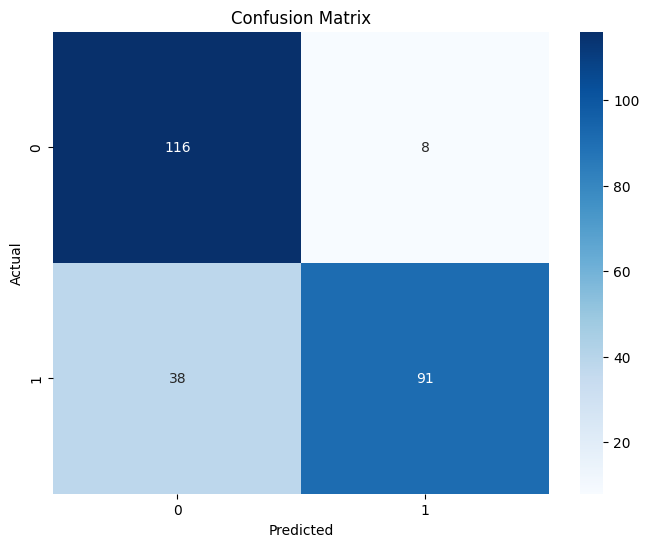

Results for AAPL


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  func,


Accuracy Score: 0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       210
           1       0.77      0.68      0.73       259

    accuracy                           0.71       469
   macro avg       0.72      0.72      0.71       469
weighted avg       0.72      0.71      0.72       469



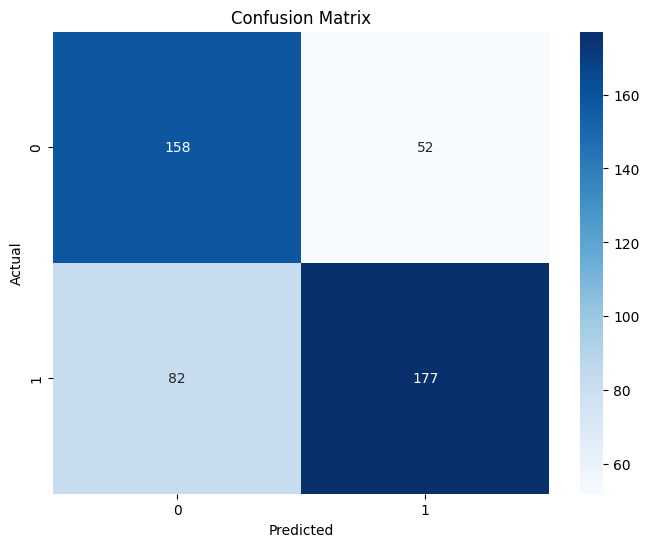

Results for AMZN


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  func,


Accuracy Score: 0.7902298850574713
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       181
           1       0.91      0.62      0.74       167

    accuracy                           0.79       348
   macro avg       0.82      0.78      0.78       348
weighted avg       0.82      0.79      0.78       348



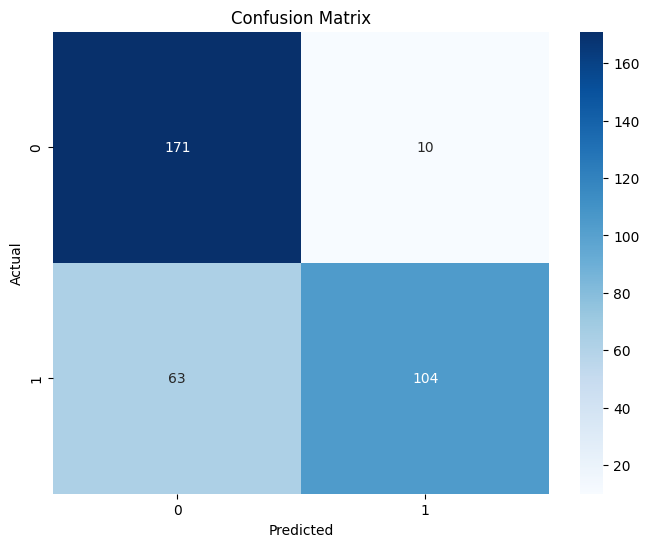

In [87]:
rf_classifier = RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
xgb_classifier = XGBClassifier(colsample_bytree=0.7, gamma=4, learning_rate=0.049770235643321115, max_depth=4, n_estimators=100, subsample=0.6)
logreg_classifier = LogisticRegression(C=0.01, max_iter=100, solver='newton-cg')


# VotingClassifier with hard voting
ensemble_model_hard = VotingClassifier(estimators=[('rf', rf_classifier),
                                              ('xgb', xgb_classifier),
                                              ('logreg', logreg_classifier)], voting='hard',weights=[0.2,0.3,0.5])

e = 0
for dataset in final_data2:
    print("Results for", tickers_symbol[e])
    e += 1

    x = dataset.drop(['Label'], axis=1).values
    y = dataset['Label'].values

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    ensemble_model_hard.fit(x_train, y_train)

    y_pred = ensemble_model_hard.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()





Results for TSLA


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Accuracy Score: 0.9051383399209486
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       124
           1       0.89      0.93      0.91       129

    accuracy                           0.91       253
   macro avg       0.91      0.90      0.90       253
weighted avg       0.91      0.91      0.91       253



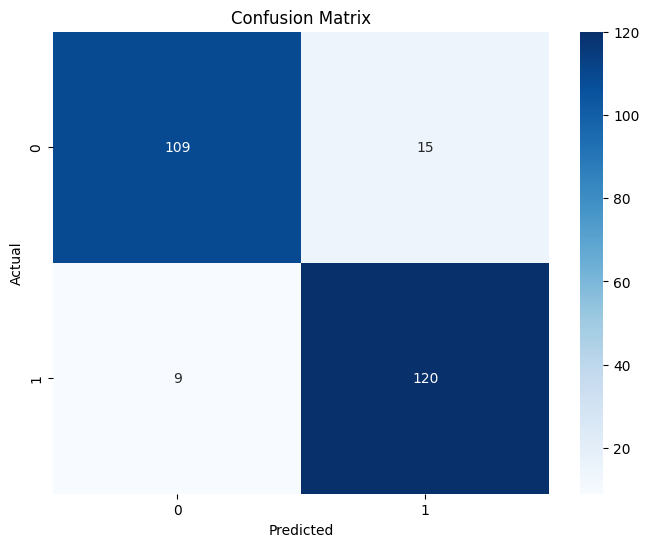

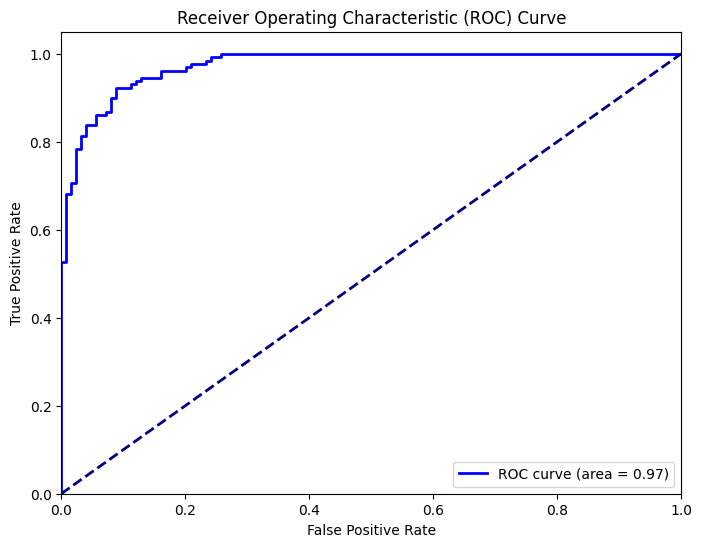

Results for AAPL


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Accuracy Score: 0.7654584221748401
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       210
           1       0.77      0.83      0.80       259

    accuracy                           0.77       469
   macro avg       0.77      0.76      0.76       469
weighted avg       0.77      0.77      0.76       469



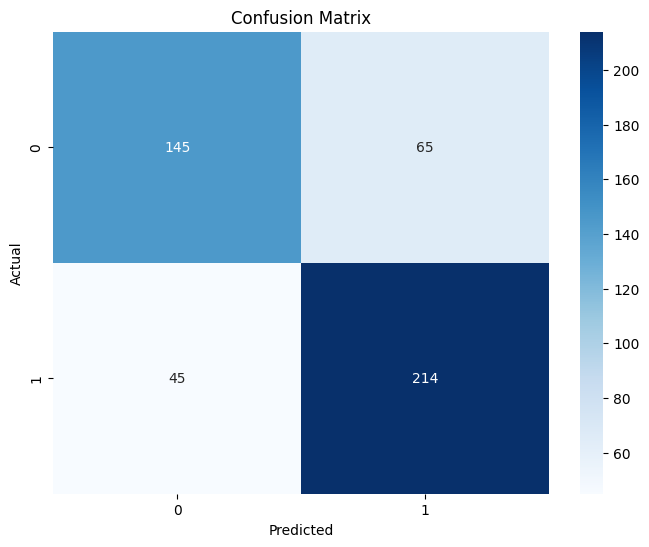

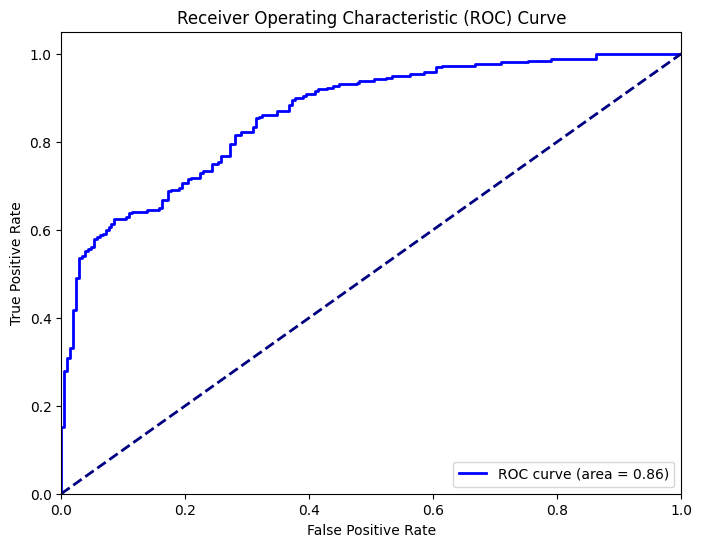

Results for AMZN


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Accuracy Score: 0.9137931034482759
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       181
           1       0.91      0.92      0.91       167

    accuracy                           0.91       348
   macro avg       0.91      0.91      0.91       348
weighted avg       0.91      0.91      0.91       348



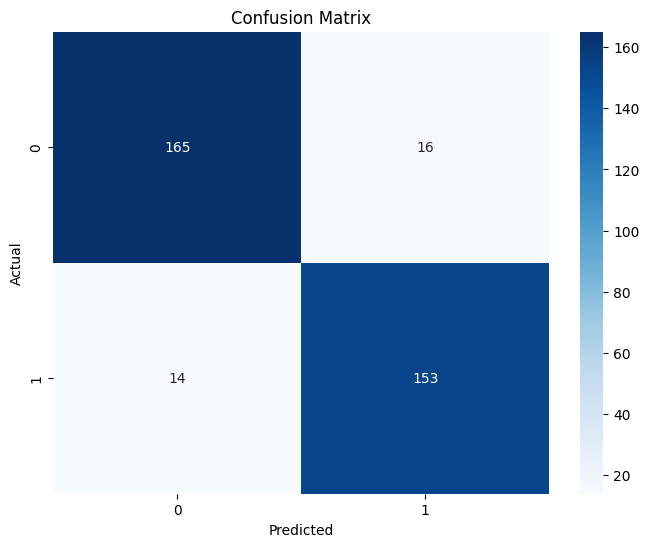

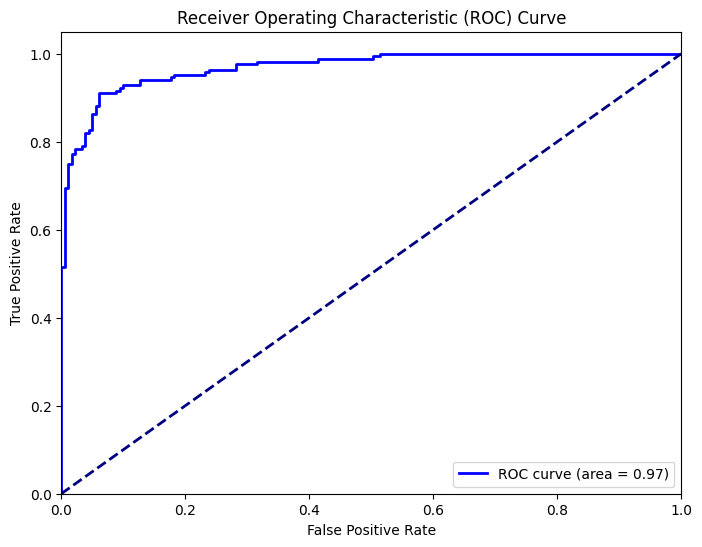

In [16]:
best_rf={'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
best_xgb={'colsample_bytree': 0.7, 'gamma': 4, 'learning_rate': 0.049770235643321115, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.6}
best_logreg={'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg'}
e=0

X=[]
for dataset in final_data2:
    print("Results for", tickers_symbol[e])
    e += 1

    x = dataset.drop(['Label'], axis=1).values
    y = dataset['Label'].values

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier(**best_rf)
    xgb_classifier = xgb.XGBClassifier(**best_xgb)
    logreg_classifier = LogisticRegression(**best_logreg)


    ensemble_model_soft = VotingClassifier(estimators=[('rf', rf_classifier),('xgb', xgb_classifier),('logreg',logreg_classifier)], voting='soft',weights=[0.2,0.3,0.5])

    ensemble_model_soft.fit(x_train, y_train)

    y_pred = ensemble_model_soft.predict(x_test)
    y_prob = ensemble_model_soft.predict_proba(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    x_test=pd.DataFrame(x_test,columns=dataset.drop(['Label'],axis=1).columns)
    x_test['Predicted_Label']=y_pred
    X.append(x_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()













In [ ]:
columns=['Date','Open', 'Adj Close', 'Predicted_Label']

trading_df_1 = pd.merge(X[0],final_data[0], on=['Open','Volume','Adj Close'],how='inner')
trading_df11 = pd.merge(X[0],df_A, on=['Open','Volume','Adj Close'],how='inner')
trading_tsla=trading_df11[columns]
trading_tsla['Date'] = pd.to_datetime(trading_tsla['Date'])
trading_tsla_sorted = trading_tsla.sort_values(by='Date')

trading_tsla_sorted.to_csv('/content/drive/My Drive/trading_tsla_sorted.csv')


trading_df_2 = pd.merge(X[1],final_data[1], on=['Open','Volume','Adj Close'],how='inner')
trading_df22 = pd.merge(X[1],df_B, on=['Open','Volume','Adj Close'],how='inner')
trading_aapl=trading_df22[columns]
trading_aapl['Date'] = pd.to_datetime(trading_aapl['Date'])
trading_aapl_sorted = trading_aapl.sort_values(by='Date')


trading_aapl_sorted.to_csv('/content/drive/My Drive/trading_sorted_aapl.csv')

trading_df_3 = pd.merge(X[2],final_data[2], on=['Open','Volume','Adj Close'],how='inner')
trading_df33 = pd.merge(X[2],df_C, on=['Open','Volume','Adj Close'],how='inner')
trading_amzn=trading_df33[columns]
trading_amzn['Date'] = pd.to_datetime(trading_amzn['Date'])
trading_amzn_sorted = trading_amzn.sort_values(by='Date')


trading_amzn_sorted.to_csv('/content/drive/My Drive/trading_amzn_sorted.csv')




In [145]:
print(trading_tsla_sorted.head())
print(trading_aapl_sorted.head())
print(trading_amzn_sorted.head())

          Date       Open  Adj Close  Predicted_Label
202 2019-06-27  14.630000  14.856000                1
6   2019-07-17  17.044666  16.990667                1
110 2019-07-25  15.566667  15.254667                0
111 2019-07-29  15.139333  15.718000                1
8   2019-08-14  15.414000  14.641333                1
          Date       Open  Adj Close  Predicted_Label
311 2013-05-06  16.275356  14.135500                1
344 2013-05-29  15.714286  13.742311                1
131 2013-06-05  15.916071  13.747253                0
60  2013-07-17  15.346429  13.290154                1
214 2013-07-23  15.214286  12.940536                1
          Date       Open  Adj Close  Predicted_Label
322 2017-08-02  50.088501  49.794498                0
32  2017-08-14  48.920502  49.165001                1
117 2017-08-22  47.776001  48.345001                1
143 2017-08-23  47.969002  47.900002                0
161 2017-08-25  47.799999  47.263000                0


In [134]:
def trades(trading_df, Initial_capital=1000):
    cash = Initial_capital
    stock_owned = 0
    Portfolio_value = Initial_capital
    Portfolio_values = []
    Stocks_held = []
    Buy_signals = []
    Sell_signals = []
    Hold_signals = []
    Action_history = []

    for i in range(1, len(trading_df)):
        Signal = trading_df['Predicted_Label'].iloc[i]
        Open_Price = trading_df['Open'].iloc[i]
        Close_Price = trading_df['Adj Close'].iloc[i]

        if (Signal == 1 and cash > 0):
            stock_bought = cash // Open_Price
            cash -= stock_bought * Open_Price
            stock_owned += stock_bought
            Buy_signals.append((i, Open_Price))
            Action_history.append('Buy')

        elif (Signal == 0 and stock_owned > 0):
            cash += stock_owned * Open_Price
            stock_owned = 0
            Sell_signals.append((i, Open_Price))
            Action_history.append('Sell')

        else:
            Hold_signals.append((i, Open_Price))
            Action_history.append('Hold')

        Portfolio_value = cash + stock_owned * Close_Price
        Portfolio_values.append(Portfolio_value)
        Stocks_held.append(stock_owned)

    Portfolio_df = pd.DataFrame({'Portfolio_value': Portfolio_values,
                                  'Stocks_held': Stocks_held,
                                  'Action': Action_history})
    print(Portfolio_df.head())

    return (Portfolio_df, Buy_signals, Sell_signals, Hold_signals)

In [55]:
def Performance_metrics(Portfolio_df, Initial_capital=1000):
    Portfolio_df['Daily_return'] = Portfolio_df['Portfolio_value'].pct_change()

    mean_strategy_return = Portfolio_df['Daily_return'].mean()
    std_strategy_return = Portfolio_df['Daily_return'].std()
    sharpe_ratio = (mean_strategy_return / std_strategy_return) * np.sqrt(252)

    rolling_max = Portfolio_df['Portfolio_value'].cummax()
    daily_drawdown = Portfolio_df['Portfolio_value'] / rolling_max - 1.0
    max_drawdown = daily_drawdown.cummin().min()

    num_trades = Portfolio_df['Action'].value_counts().get('Buy', 0) + Portfolio_df['Action'].value_counts().get('Sell', 0)

    buy_signals = Portfolio_df[Portfolio_df['Action'] == 'Buy'].index
    sell_signals = Portfolio_df[Portfolio_df['Action'] == 'Sell'].index
    wins = [1 for i in range(len(sell_signals)) if df['Adj Close'].iloc[sell_signals[i]] > df['Open'].iloc[buy_signals[i]]]
    win_ratio = sum(wins) / len(sell_signals) if (len(sell_signals) > 0) else (0)

    metrics = {'sharpe_ratio': sharpe_ratio,
                'max_drawdown': max_drawdown,
                'num_trades': num_trades,
                'win_ratio': win_ratio,

                'final_portfolio_value': Portfolio_df['Portfolio_value'].iloc[-1],
                'volatility': std_strategy_return * np.sqrt(252)}

    return metrics

In [139]:



def plot_results(Portfolio_df, Buy_signals, Sell_signals, Hold_signals):
    plt.figure(figsize=(12, 6))
    plt.plot(Portfolio_df['Portfolio_value'], label='Portfolio Value', color='blue', linewidth=2)



    plt.legend()
    plt.grid(False)

    plt.title('Portfolio Value Over Time ')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value ($)')


    plt.show()




In [141]:
def main(df):
    df.set_index('Date', inplace=True)

    Portfolio_df, Buy_signals, Sell_signals, Hold_signals = trades(df)
    metrics = Performance_metrics(Portfolio_df)

    print(f"Sharpe Ratio: {metrics['sharpe_ratio']:.2f}")
    print(f"Maximum Drawdown: {metrics['max_drawdown']:.2%}")
    print(f"Number of Trades Executed: {metrics['num_trades']}")
    print(f"Win Ratio: {metrics['win_ratio']:.2%}")
    print(f"Final Portfolio Value: {metrics['final_portfolio_value']:.2f}")


    plot_results(Portfolio_df, Buy_signals, Sell_signals, Hold_signals)



   Portfolio_value  Stocks_held Action
0       996.868061         58.0    Buy
1       914.276018          0.0   Sell
2       948.996077         60.0    Buy
3       884.396009         60.0    Buy
4       868.476076         60.0    Buy
Sharpe Ratio: 4.18
Maximum Drawdown: -55.92%
Number of Trades Executed: 198
Win Ratio: 51.56%
Final Portfolio Value: 53945.07


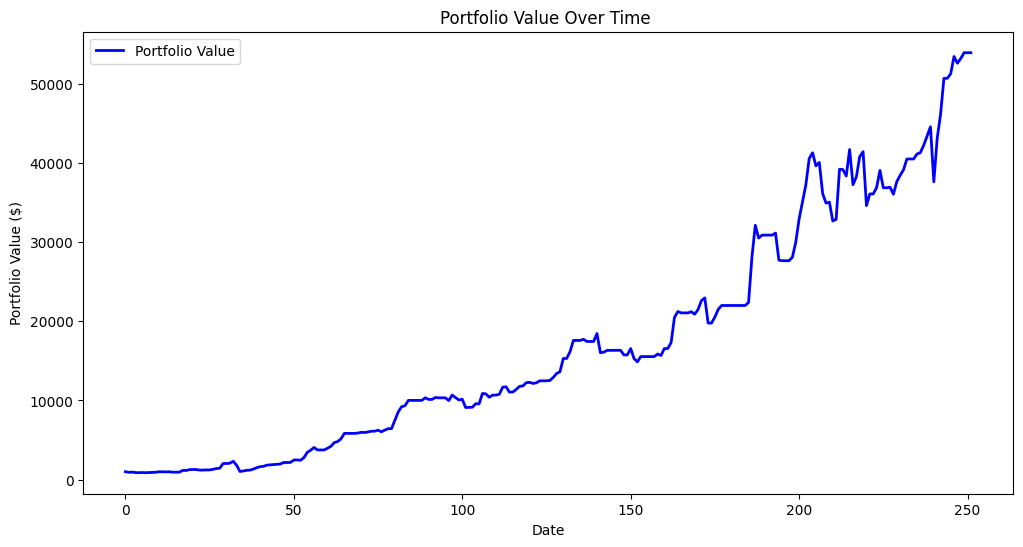

In [142]:
td1=pd.read_csv('/content/drive/My Drive/trading_tsla_sorted.csv')
main(td1)

   Portfolio_value  Stocks_held Action
0       875.765615         63.0    Buy
1      1012.712461          0.0   Sell
2       879.054624         65.0    Buy
3       856.329394         65.0    Buy
4      1038.480288          0.0   Sell
Sharpe Ratio: 2.71
Maximum Drawdown: -23.35%
Number of Trades Executed: 372
Win Ratio: 48.94%
Final Portfolio Value: 30069.88


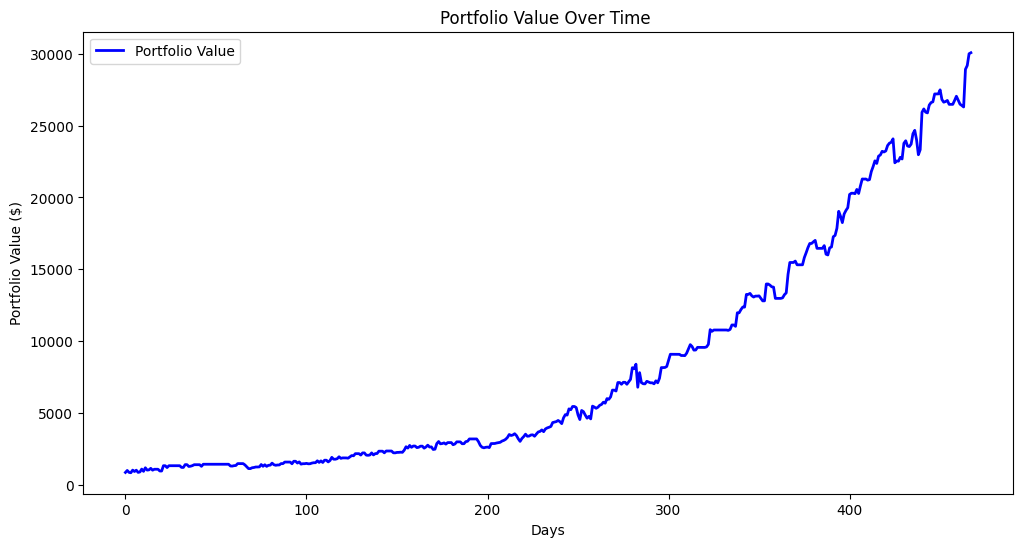

In [137]:
td2=pd.read_csv('/content/drive/My Drive/trading_sorted_aapl.csv')
main(td2)

   Portfolio_value  Stocks_held Action
0      1004.889984         20.0    Buy
1       988.489990         20.0    Buy
2       980.970001          0.0   Sell
3       980.970001          0.0   Hold
4       995.818462         19.0    Buy
Sharpe Ratio: 3.85
Maximum Drawdown: -24.57%
Number of Trades Executed: 255
Win Ratio: 53.49%
Final Portfolio Value: 10780.61


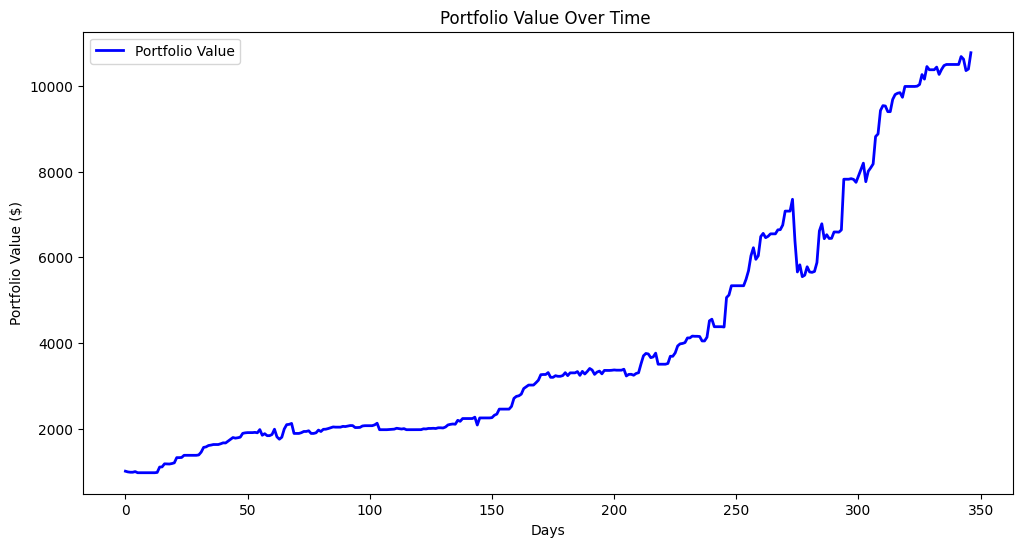

In [138]:
td3=pd.read_csv('/content/drive/My Drive/trading_amzn_sorted.csv')
main(td3)